## Load Data

In [4]:
"""Load Data
Structure:
    1. Imports, Variables, Functions
    2. Load Data
"""

# 1. Imports, Variables, Functions
# imports
import pandas as pd, numpy as np, os, sys
import anndata as ad
import logging
from typing import *
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
)
from sklearn.metrics import confusion_matrix, classification_report

logging.basicConfig(level=logging.INFO)

# variables
run_dir = os.path.join("..", "outputs", "run-24-09-27-10")
# run_dir = os.path.join("..", "outputs", "run-24-09-28-02")
output_dir = os.path.join(run_dir, "outputs")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# functions


def load_run_output(input_dir: str) -> tuple:
    """Load the output of a run
    Args:
        input_dir (str): path to the run output directory
    Returns:
        loaded_variables (tuple): tuple of loaded variables
    """

    variables_to_load = [
        # "split",
        "predictions_test",
        "labels_test",
        "results_test",
        "all_outputs_test",
        "predictions_train",
        "labels_train",
        "results_train",
        "all_outputs_train",
        "adata_orig",
        "id2type",
    ]

    # initialize loaded variables as an empty tuple
    loaded_variables = ()

    # loop through variables
    for variable in variables_to_load:
        if variable.startswith("adata"):
            loaded_variable = ad.read_h5ad(os.path.join(input_dir, f"{variable}.h5ad"))
        else:
            with open(os.path.join(input_dir, f"{variable}.pkl"), "rb") as f:
                loaded_variable = pickle.load(f)

        # add the loaded variable to the tuple
        loaded_variables += (loaded_variable,)

    print(f"Nº of loaded variables {len(loaded_variables)}")

    return loaded_variables


# 2. Load Data
(
    # split,
    predictions_test,
    labels_test,
    results_test,
    all_outputs_test,
    predictions_train,
    labels_train,
    results_train,
    all_outputs_train,
    adata_orig,
    id2type,
) = load_run_output(run_dir)

# load json

with open(os.path.join(run_dir, "parameters.json"), "r") as f:
    parameters = json.load(f)

for k, v in parameters.items():
    print(f"{k}: {v}")

Nº of loaded variables 10
data_path: /aloy/home/ddalton/projects/scGPT_playground/data/pp_data-24-09-25-03/data.h5ad
max_seq_len: 3501
batch_size: 16
gene_presence_pct: 0.9
benchmark_data: False
split_type: stratified
n_splits: 3
n_tested_splits: 3
epochs: 20
gene_filtering: top_presence


In [5]:
data = list()

for i in range(0, len(results_test)):
    data.append(
        {
            "accuracy": results_test[i]["test/accuracy"],
            "precision": results_test[i]["test/precision"],
            "recall": results_test[i]["test/recall"],
            "macro_f1": results_test[i]["test/macro_f1"],
            "type": "test",
        }
    )
    data.append(
        {
            "accuracy": results_train[i]["test/accuracy"],
            "precision": results_train[i]["test/precision"],
            "recall": results_train[i]["test/recall"],
            "macro_f1": results_train[i]["test/macro_f1"],
            "type": "train",
        }
    )

df_performance = pd.DataFrame(data)
df_performance

accuracy  precision    recall  macro_f1   type
0  0.655082   0.598814  0.581912  0.573485   test
1  0.823813   0.854184  0.783947  0.815217  train
2  0.624286   0.637840  0.506372  0.535202   test
3  0.818011   0.850024  0.792636  0.818367  train
4  0.603148   0.606588  0.537192  0.562273   test
5  0.803536   0.854748  0.760922  0.798488  train

(0.0, 1.0)

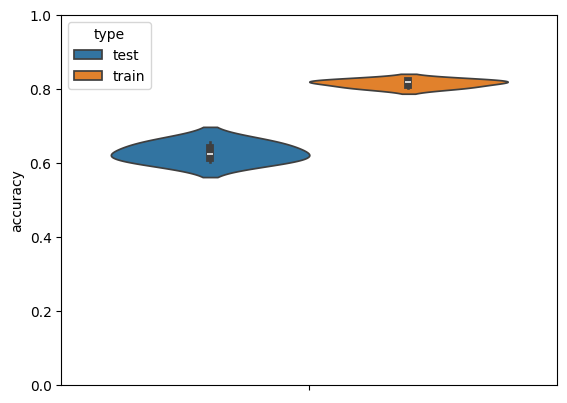

In [3]:
sns.violinplot(data=df_performance, hue="type", y="accuracy")


plt.ylim(0, 1)

In [4]:
# Grouping the dataframe by 'Type' and computing the mean for each metric
df_grouped_mean = df_performance.groupby("type").mean()

# Computing the standard deviation for each metric
df_grouped_std = df_performance.groupby("type").std()

# Merging the mean and std into a single dataframe with the format "mean ± std"
df_performance_summary = (
    df_grouped_mean.astype(str) + " ± " + df_grouped_std.astype(str)
)

# Formatting the mean and std to display only 3 decimal places
df_performance_summary = (
    df_grouped_mean.round(3).astype(str) + " ± " + df_grouped_std.round(3).astype(str)
)


df_performance_summary

accuracy      precision         recall       macro_f1
type                                                             
test   0.628 ± 0.026  0.614 ± 0.021  0.542 ± 0.038   0.557 ± 0.02
train   0.815 ± 0.01  0.853 ± 0.003  0.779 ± 0.016  0.811 ± 0.011

In [5]:
# Grouping the dataframe by 'Type' and computing the mean for each metric
df_grouped_mean = df_performance.groupby("type").mean()

# Computing the standard deviation for each metric
df_grouped_std = df_performance.groupby("type").std()

# Merging the mean and std into a single dataframe with the format "mean ± std"
df_performance_summary = (
    df_grouped_mean.astype(str) + " ± " + df_grouped_std.astype(str)
)

# Formatting the mean and std to display only 3 decimal places
df_performance_summary = (
    df_grouped_mean.round(3).astype(str) + " ± " + df_grouped_std.round(3).astype(str)
)


df_performance_summary

accuracy      precision         recall       macro_f1
type                                                             
test   0.628 ± 0.026  0.614 ± 0.021  0.542 ± 0.038   0.557 ± 0.02
train   0.815 ± 0.01  0.853 ± 0.003  0.779 ± 0.016  0.811 ± 0.011

In [6]:
# Grouping the dataframe by 'Type' and computing the mean for each metric
df_grouped_mean = df_performance.groupby("type").mean()

# Computing the standard deviation for each metric
df_grouped_std = df_performance.groupby("type").std()

# Merging the mean and std into a single dataframe with the format "mean ± std"
df_performance_summary = df_grouped_mean.astype(str)

# Formatting the mean and std to display only 3 decimal places
df_performance_summary = df_grouped_mean.round(3).astype(str)


df_performance_summary

accuracy precision recall macro_f1
type                                    
test     0.628     0.614  0.542    0.557
train    0.815     0.853  0.779    0.811

# scGPT Plots

Fold 0
Fold 1
Fold 2


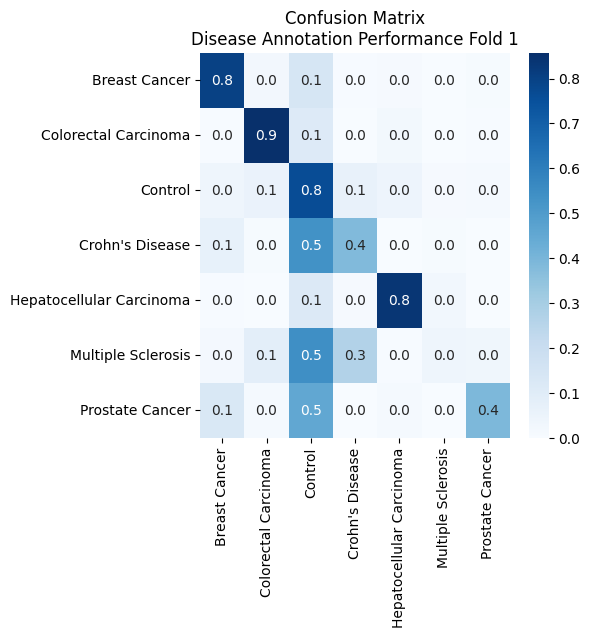

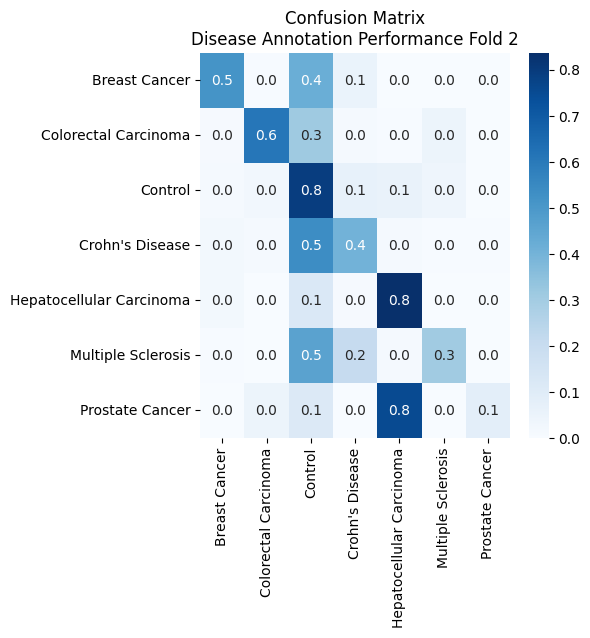

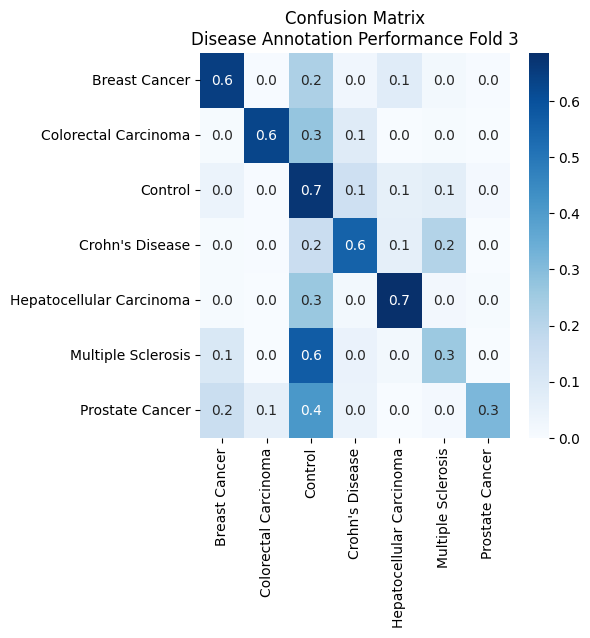

In [62]:
data_type = "test"


for i in range(0, len(results_test)):
    print(f"Fold {i}")

    if data_type == "test":
        adata_test = adata_orig.obs[adata_orig.obs[f"test_split_{i+1}"] == 1]
        predictions = predictions_test[i]
        celltypes = adata_test["celltype"].values
        labels = labels_test
    elif data_type == "train":
        predictions = predictions_train
        adata_train = adata_orig[adata_orig.obs[f"test_split_{i+1}"] == 0]
        celltypes = adata_train.obs["celltype"].values
        labels = labels_train

    celltypes = list(celltypes)
    for j in set([id2type[i][p] for p in predictions]):
        if j not in celltypes:
            celltypes.remove(j)

    # print(len(labels), len(predictions))

    cm = confusion_matrix(labels[i], predictions)
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    # sorted celltypes by the order of the confusion matrix
    sorted_celltypes = list()
    for k in sorted(list(set(labels[i]))):
        sorted_celltypes.append(id2type[i][k])

    cm = pd.DataFrame(
        cm,
        index=sorted_celltypes[: cm.shape[0]],
        columns=sorted_celltypes[: cm.shape[1]],
    )
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt=".1f", cmap="Blues")
    plt.title(f"Confusion Matrix\nDisease Annotation Performance Fold {i+1}")
    plt.savefig(
        os.path.join(output_dir, f"{data_type}.fold_{i+1}.confusion_matrix.png"),
        dpi=300,
    )

In [6]:
from typing import *


def merge_embeddings(output: List[Dict]) -> np.array:
    """Merge Embeddings
    Args:
        output (List[Dict]): List of dictionaries with embeddings
    Returns:
        np.array: Merged embeddings
    """
    for i in range(len(output)):
        embeddings_i = output[i]["cell_emb"].numpy()

        if i == 0:
            embeddings = embeddings_i
        else:
            embeddings = np.concatenate((embeddings, embeddings_i), axis=0)
    return embeddings


for i in range(0, len(all_outputs_test)):
    print(f"Fold {i}")
    scgpt_emb_test = merge_embeddings(all_outputs_test[i])
    logging.info(f"SCGPT Embeddings Test Shape: {scgpt_emb_test.shape}")

    scgpt_emb_train = merge_embeddings(all_outputs_train[i])
    logging.info(f"SCGPT Embeddings Train Shape: {scgpt_emb_train.shape}")
    break

Fold 0


INFO:root:SCGPT Embeddings Test Shape: (5323, 512)
INFO:root:SCGPT Embeddings Train Shape: (10591, 512)


In [9]:
diseases_of_interest_set = adata_test.obs["disease_study"].unique()

d_data = dict()
d_data["n_diseases"] = dict()
d_data["n_controls"] = dict()
d_data["n_datasets"] = dict()
d_data["n_genes"] = dict()
d_data["n_de_signatures"] = dict()


for disease in diseases_of_interest_set:
    # Nº Disease Samples
    states = adata_test.obs.query(f'disease_study == "{disease}"')["celltype"].to_list()
    n_diseases = len(states) - states.count("Control")
    logging.info(f"{disease} Nº of Diseases: {n_diseases}")

    # Nº of Control Samples
    n_controls = states.count("Control")
    logging.info(f"{disease} Nº Controls: {n_controls}")

    # Nº of Datasets
    datasets = adata_test.obs.query(f'disease_study == "{disease}"')[
        "dataset"
    ].to_list()
    n_datasets = len(set(datasets))
    logging.info(f"{disease} Nº of Datasets: {len(datasets)}")

    # Nº of Genes
    n_genes = adata_test.obs.query(f'disease_study == "{disease}"')["n_genes"].to_list()
    logging.info(
        f"{disease} Nº of Genes: {np.mean(n_genes):.0f} ± {np.std(n_genes):.0f}"
    )

    # Nº of DE signatures
    all_ids = adata_test.obs.query(f'disease_study == "{disease}"')["ids"].to_list()

    de_signatures = list(set([id.split(";")[0] for id in all_ids]))
    n_de_signatures = len(de_signatures)
    logging.info(f"{disease} Nº of DE Signatures: {n_de_signatures}")

    # append to dictionary
    d_data["n_diseases"][disease] = n_diseases
    d_data["n_controls"][disease] = n_controls
    d_data["n_datasets"][disease] = len(datasets)
    d_data["n_genes"][disease] = n_genes
    d_data["n_de_signatures"][disease] = n_de_signatures

NameError: name 'adata_test' is not defined

In [221]:
import seaborn as sns
from matplotlib import pyplot as plt

irb_colors = [
    "#ffd81cff",
    "#f6972dff",
    "#f2612dff",
    "#574270ff",
    "#00589bff",
    "#002f58ff",
]

labels = list(d_data["n_diseases"].keys())
n_controls = [d_data["n_controls"][x] for x in labels]
n_diseases = [d_data["n_diseases"][x] for x in labels]

df_plot = pd.DataFrame(
    {
        "Disease": labels,
        "Nº of Diseases": n_diseases,
        "Nº of Controls": n_controls,
    }
)

# Transform the DataFrame to long format
df_long = df_plot.melt(id_vars="Disease", var_name="Category", value_name="Count")

# Plotting with seaborn
plt.figure(figsize=(5, 4))
sns.barplot(
    data=df_long,
    x="Disease",
    y="Count",
    hue="Category",
    palette=[irb_colors[2], irb_colors[0]],
)

# Adding labels and title
plt.xlabel("", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Number of GEx Samples by Disease", fontsize=14)
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "n_samples.png"), dpi=300, bbox_inches="tight")

/tmp/ipykernel_32912/3272457251.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_32912/3272457251.py:20: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(


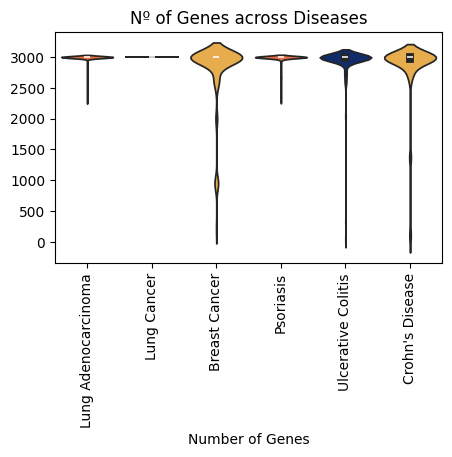

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming d_data is defined and contains the necessary data
# labels = list(d_data["n_diseases"].keys())
# n_genes = [d_data["n_genes"][x] for x in labels]

labels = adata_train.obs["disease_study"].to_list()
n_genes = (~np.isnan(adata_train.X)).sum(axis=1)

flat_genes = []
flat_labels = []
# for label, genes_list in zip(labels, n_genes):
#     flat_genes.extend(genes_list)
#     flat_labels.extend([label] * len(genes_list))

plt.figure(figsize=(5, 3))

# Violin plot
sns.violinplot(
    x=labels, y=n_genes, palette=[irb_colors[2], irb_colors[4], irb_colors[0]]
)

# Adding titles and labels
plt.xlabel("Number of Genes")
plt.ylabel("")
plt.xticks(rotation=90)
plt.title("Nº of Genes across Diseases")
plt.savefig(os.path.join(output_dir, "n_genes.png"), dpi=300, bbox_inches="tight")

## Explore Embeddings

In [7]:
"""Explore Embeddings

Structure:
    1. Imports, Variables, Functions
    2. PCA Plots
    3. UMAP Plots
    4. Cosine Distance
    5. Pearson Correlation
    6. Euclidean Distance
"""

# 1. Imports, Variables, Functions
# imports
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap, to_rgba_array
from scipy.interpolate import make_interp_spline
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap, to_rgba_array
from scipy.interpolate import make_interp_spline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# variables

irb_colors = [
    "#ffd81cff",
    "#f6972dff",
    "#f2612dff",
    "#574270ff",
    "#00589bff",
    "#002f58ff",
]

irb_colors = ["#ffb234", "#ff958e", "#ff6028", "#2779ff", "#022778"]


# functions
def plot_metrics(values, labels, metric, title=None, output_txt="", save=False):

    assert metric in [
        "Cosine Similarity",
        "Euclidean Distance",
        "Pearson Correlation",
    ], "Invalid metric"

    min_val = min([x for sublist in values for x in sublist])
    max_val = max([x for sublist in values for x in sublist])

    # change min max values
    if metric == "Cosine Similarity":
        min_val = 0
        max_val = 2
    elif metric == "Pearson Correlation":
        min_val = -1
        max_val = 1

    # Get a color map
    cmap = plt.get_cmap("hsv")

    # Define unique colors
    colors = [cmap(i / len(labels)) for i in range(len(labels))]

    # Define bin range
    bin_range = np.arange(min_val, max_val + 0.01, (max_val - min_val) / 20)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(4, 4))

    for i, (v, l) in enumerate(zip(values, labels)):

        # Plot control vs control
        density, bins = np.histogram(
            v, bins=bin_range, density=True
        )  # Calculate the density
        bin_centers = 0.5 * (bins[1:] + bins[:-1])  # Calculate the center of each bin
        ax.plot(
            bin_centers, density, "-", color=colors[i], label=l
        )  # Create the density plot

        # Fill area under the curve
        ax.fill_between(bin_centers, density, color=colors[i], alpha=0.1)

    # Set y-axis limit
    ax.set_ylim(0, np.max(density) * 1.1)

    # Set x-axis limit
    ax.set_xlim(min_val, max_val)

    # Add labels and title
    ax.set_xlabel(f"{metric}")
    ax.set_ylabel("Density")

    if title:
        ax.set_title(f"{title}\nPairwise {metric} Distributions")
    else:
        ax.set_title(f"Pairwise {metric} Distributions")

    # Add legend
    ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

    # Show grid
    ax.grid(True)

    # Show plot
    if save:
        plt.savefig(
            os.path.join(
                output_dir,
                f"pairwise_{metric.lower().replace(' ', '_')}.scgpt.{output_txt}.png",
            ),
            dpi=300,
            bbox_inches="tight",
        )


def get_pairwise_similarities(matrix, indexes_1, indexes_2=None):

    pairs = list()
    if indexes_2 is not None:

        for i in indexes_1:
            for j in indexes_2:
                pairs.append([i, j])

        pairs = np.array(pairs)
        return matrix[pairs[:, 0], pairs[:, 1]]

    else:
        for n, i in enumerate(indexes_1):
            for j in indexes_1[n + 1 :]:
                pairs.append([i, j])

        pairs = np.array(pairs)
        return matrix[pairs[:, 0], pairs[:, 1]]

### 2. UMAP Plots

In [50]:
import matplotlib.pyplot as plt
import umap
from mpl_toolkits.mplot3d import Axes3D

embedding_type = "Raw Expression"

for i in range(0, len(results_test)):
    print(f"Fold{i}")
    adata_test = adata_orig[adata_orig.obs[f"test_split_{i+1}"] == 1]
    adata_train = adata_orig[adata_orig.obs[f"test_split_{i+1}"] == 0]

    umap_model = umap.UMAP(n_components=3)

    if embedding_type == "Raw Expression":
        umap_embeddings_test = umap_model.fit_transform(np.nan_to_num(adata_test.X, 0))
        umap_embeddings_train = umap_model.fit_transform(
            np.nan_to_num(adata_train.X, 0)
        )

    elif embedding_type == "scGPT":
        # Perform UMAP with 3 components
        umap_embeddings_test = umap_model.fit_transform(scgpt_emb_test)
        umap_embeddings_train = umap_model.fit_transform(scgpt_emb_train)

    break

Fold0


/home/ddalton/miniconda3/envs/scgpt/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/ddalton/miniconda3/envs/scgpt/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


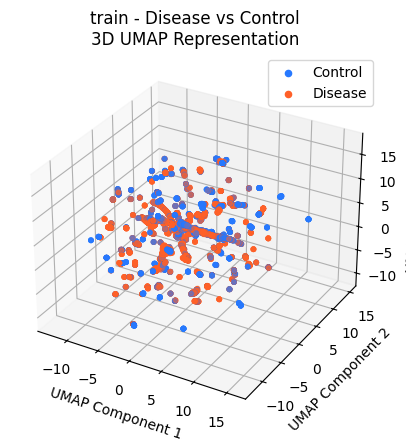

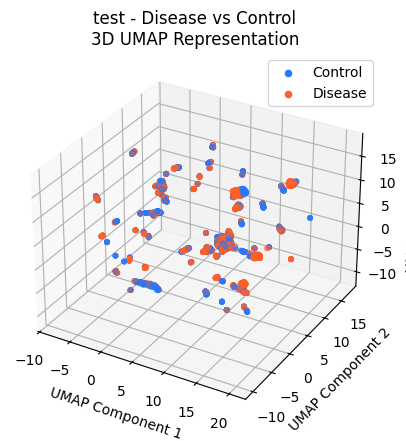

In [129]:
for data_type in ["train", "test"]:
    if data_type == "train":
        adata = adata_train
        embeddings = umap_embeddings_train
    else:
        adata = adata_test
        embeddings = umap_embeddings_test

    labels = [
        "Disease" if c != "Control" else "Control"
        for c in adata.obs["celltype"].to_list()
    ]

    # Map labels to colors
    label_color_map = {"Control": irb_colors[3], "Disease": irb_colors[2]}
    colors = [label_color_map.get(label, "grey") for label in labels]

    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Scatter plot with colors
    ax.scatter(
        embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, s=10, alpha=0.5
    )

    # Adding legend
    for label in label_color_map:
        ax.scatter([], [], [], c=label_color_map[label], label=label)
    ax.legend()

    # Set labels
    ax.set_xlabel("UMAP Component 1")
    ax.set_ylabel("UMAP Component 2")
    ax.set_zlabel("UMAP Component 3")
    ax.set_title(f"{data_type} - Disease vs Control\n3D UMAP Representation")

    # Display the plot
    plt.savefig(
        os.path.join(output_dir, f"{data_type}.umap_3d.disease_control.png"),
        dpi=300,
        bbox_inches="tight",
    )

ValueError: 'c' argument has 7596 elements, which is inconsistent with 'x' and 'y' with size 10591.

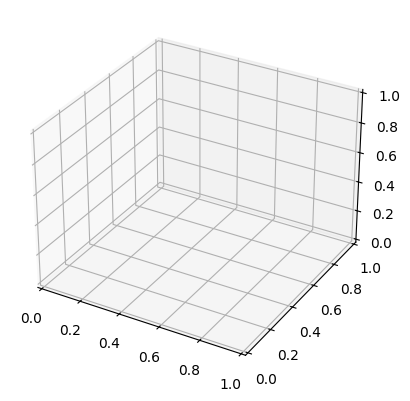

In [96]:
for data_type in ["train", "test"]:
    if data_type == "train":
        adata = adata_train
        embeddings = umap_embeddings_train
    else:
        adata = adata_test
        embeddings = umap_embeddings_test

    labels = adata.obs["library"].to_list()

    # Map labels to colors
    label_color_map = {"RNA-Seq": "red", "Microarray": "limegreen"}
    colors = [label_color_map.get(label, "grey") for label in labels]

    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Scatter plot with colors
    ax.scatter(
        embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=0.3
    )

    # Adding legend
    for label in label_color_map:
        ax.scatter([], [], [], c=label_color_map[label], label=label)
    ax.legend()

    # Set labels
    ax.set_xlabel("UMAP Component 1")
    ax.set_ylabel("UMAP Component 2")
    ax.set_zlabel("UMAP Component 3")
    ax.set_title(f"{data_type} - Sequencing Type\n3D UMAP Representation")

    # Display the plot
    plt.savefig(
        os.path.join(output_dir, f"{embedding_type}.{data_type}.umap_3d.library.png"),
        dpi=300,
        bbox_inches="tight",
    )

In [97]:
adata_train.shape

(7596, 3496)

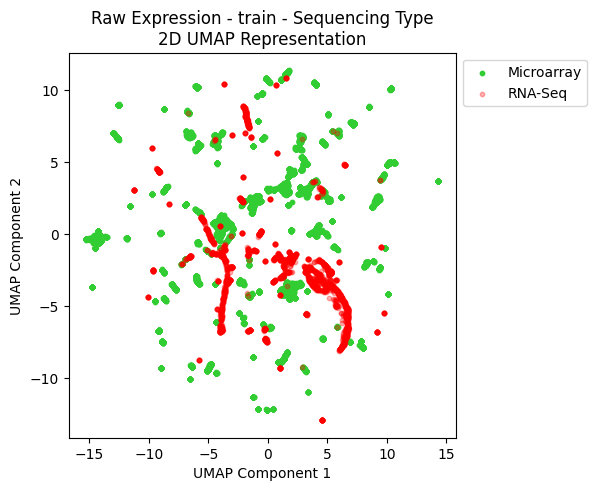

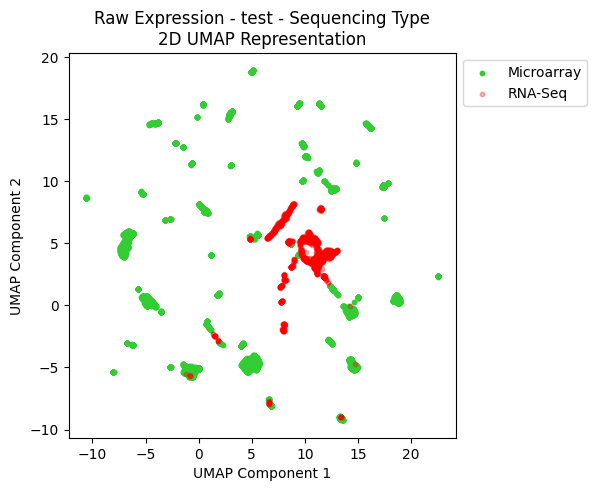

In [51]:
for data_type in ["train", "test"]:
    if data_type == "train":
        adata = adata_train
        embeddings = umap_embeddings_train
    else:
        adata = adata_test
        embeddings = umap_embeddings_test

    labels = adata.obs["library"].to_list()

    # Map labels to colors
    label_color_map = {"RNA-Seq": "red", "Microarray": "limegreen"}

    # Create a 2D scatter plot
    fig, ax = plt.subplots()

    # set figure size
    fig.set_size_inches(5, 5)

    # Then plot Microarray points
    microarray_mask = [label == "Microarray" for label in labels]
    ax.scatter(
        embeddings[microarray_mask, 0],
        embeddings[microarray_mask, 1],
        c="limegreen",
        alpha=1,
        label="Microarray",
        s=10,
    )

    # First plot RNA-Seq points
    rna_seq_mask = [label == "RNA-Seq" for label in labels]
    ax.scatter(
        embeddings[rna_seq_mask, 0],
        embeddings[rna_seq_mask, 1],
        c="red",
        alpha=0.3,
        label="RNA-Seq",
        s=10,
    )

    # Adding legend
    ax.legend()

    ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

    # Set labels
    ax.set_xlabel("UMAP Component 1")
    ax.set_ylabel("UMAP Component 2")
    ax.set_title(
        f"{embedding_type} - {data_type} - Sequencing Type\n2D UMAP Representation"
    )

    # Display the plot
    plt.savefig(
        os.path.join(output_dir, f"{embedding_type}.{data_type}.umap_2d.library.png"),
        dpi=300,
        bbox_inches="tight",
    )

ids    dataset dataset_id  batch  batch_id  \
109    DSA00181;GSM6322884;Control  GSE207912  GSE207912     22        22   
110    DSA00181;GSM6322885;Control  GSE207912  GSE207912     22        22   
111       DSA00181;GSM6322890;Case  GSE207912  GSE207912     22        22   
112       DSA00181;GSM6322891;Case  GSE207912  GSE207912     22        22   
113    DSA00209;GSM2711996;Control  GSE101685  GSE101685     58        58   
...                            ...        ...        ...    ...       ...   
16115     DSA10295;GSM1012438;Case   GSE41258   GSE41258    225       225   
16116     DSA10295;GSM1012444;Case   GSE41258   GSE41258    225       225   
16117     DSA10295;GSM1012448;Case   GSE41258   GSE41258    225       225   
16118     DSA10295;GSM1012449;Case   GSE41258   GSE41258    225       225   
16119     DSA10295;GSM1012450;Case   GSE41258   GSE41258    225       225   

          dsaid tissue  n_genes                   disease  \
109    DSA00181    nan    19399                   Control   
110    DSA00181    nan    19399                   Control   
111    DSA00181    nan    19399  Hepatocellular Carcinoma   
112    DSA00181    nan    19399  Hepatocellular Carcinoma   
113    DSA00209  Liver    17043                   Control   
...         ...    ...      ...                       ...   
16115  DSA10295   Lung    12002      Colorectal Carcinoma   
16116  DSA10295   Lung    12002      Colorectal Carcinoma   
16117  DSA10295   Lung    12002      Colorectal Carcinoma   
16118  DSA10295   Lung    12002      Colorectal Carcinoma   
16119  DSA10295   Lung    12002      Colorectal Carcinoma   

                       celltype             disease_study     library  \
109                     Control  Hepatocellular Carcinoma     RNA-Seq   
110                     Control  Hepatocellular Carcinoma     RNA-Seq   
111    Hepatocellular Carcinoma  Hepatocellular Carcinoma     RNA-Seq   
112    Hepatocellular Carcinoma  Hepatocellular Carcinoma     RNA-Seq   
113                     Control  Hepatocellular Carcinoma  Microarray   
...                         ...                       ...         ...   
16115      Colorectal Carcinoma      Colorectal Carcinoma  Microarray   
16116      Colorectal Carcinoma      Colorectal Carcinoma  Microarray   
16117      Colorectal Carcinoma      Colorectal Carcinoma  Microarray   
16118      Colorectal Carcinoma      Colorectal Carcinoma  Microarray   
16119      Colorectal Carcinoma      Colorectal Carcinoma  Microarray   

       celltype_id  test_split_1  test_split_2  test_split_3  
109              2             1             0             0  
110              2             1             0             0  
111              4             1             0             0  
112              4             1             0             0  
113              2             1             0             0  
...            ...           ...           ...           ...  
16115            1             1             0             0  
16116            1             1             0             0  
16117            1             1             0             0  
16118            1             1             0             0  
16119            1             1             0             0  

[5323 rows x 16 columns]

/tmp/ipykernel_339081/907551064.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap(
/tmp/ipykernel_339081/907551064.py:54: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], [], c=label_color_map[label], label=label)


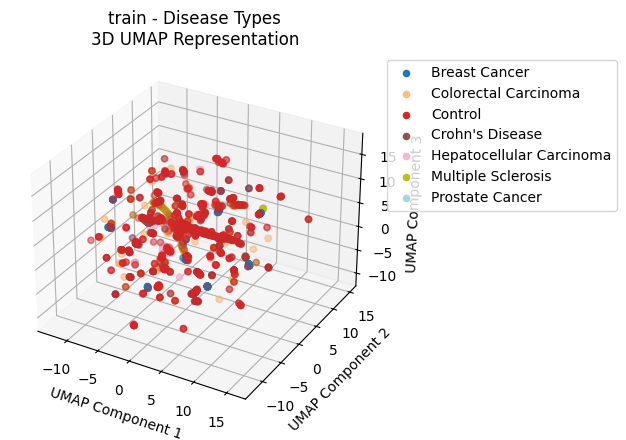

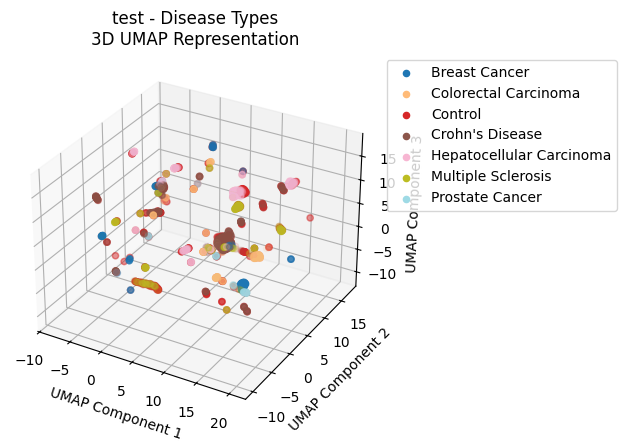

In [127]:
for data_type in ["train", "test"]:
    if data_type == "train":
        adata = adata_train
        embeddings = umap_embeddings_train
    else:
        adata = adata_test
        embeddings = umap_embeddings_test

    labels = adata.obs["celltype"].to_list()
    unique_labels = list(set(labels))
    unique_labels.sort()

    # Generate a color map using matplotlib
    colormap = plt.cm.get_cmap(
        "tab20", len(unique_labels)
    )  # You can change "viridis" to any other colormap

    # Map each label to a color
    label_color_map = {label: colormap(i) for i, label in enumerate(unique_labels)}

    # label_color_map.update({"Control": "grey"})

    colors = np.array([label_color_map[label] for label in labels])

    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Scatter plot with colors
    c_idxs = [i for i, label in enumerate(labels) if label == "Control"]
    d_idxs = [i for i, label in enumerate(labels) if label != "Control"]

    # Plot the disease points first
    ax.scatter(
        embeddings[d_idxs, 0],
        embeddings[d_idxs, 1],
        embeddings[d_idxs, 2],
        c=colors[d_idxs],
        alpha=0.1,
    )

    # Then plot the control points (which will appear on top)
    ax.scatter(
        embeddings[c_idxs, 0],
        embeddings[c_idxs, 1],
        embeddings[c_idxs, 2],
        c=colors[c_idxs],
        alpha=0.1,
    )

    # Adding legend
    for label in label_color_map:

        ax.scatter([], [], [], c=label_color_map[label], label=label)
    ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

    # Set labels
    ax.set_xlabel("UMAP Component 1")
    ax.set_ylabel("UMAP Component 2")
    ax.set_zlabel("UMAP Component 3")
    ax.set_title(f"{data_type} - Disease Types\n3D UMAP Representation")

    # Display the plot
    plt.savefig(
        os.path.join(output_dir, f"{data_type}.umap_3d.diseases.png"),
        dpi=300,
        bbox_inches="tight",
    )

/tmp/ipykernel_7441/752719886.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap(
/tmp/ipykernel_7441/752719886.py:53: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], c=label_color_map[label], label=label)


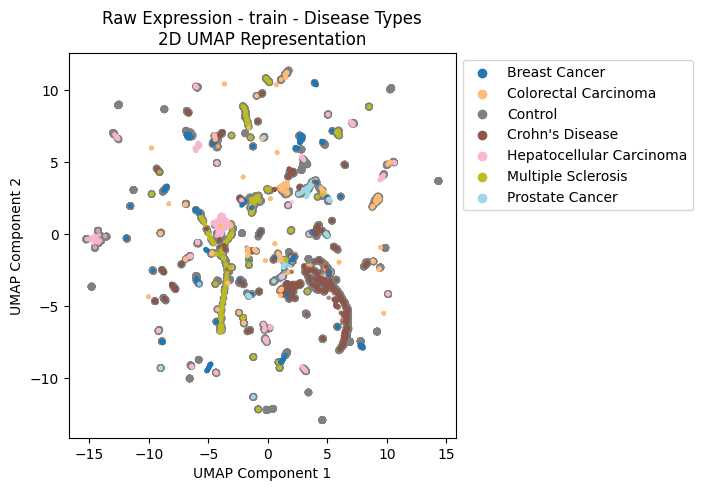

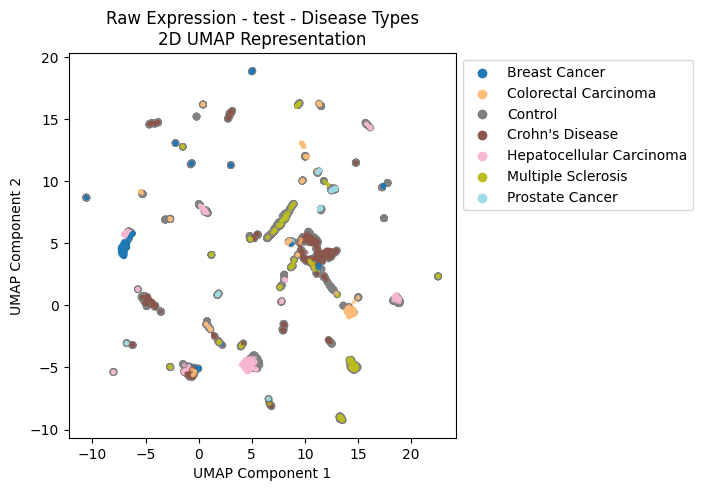

In [52]:
for data_type in ["train", "test"]:
    if data_type == "train":
        adata = adata_train
        embeddings = umap_embeddings_train
    else:
        adata = adata_test
        embeddings = umap_embeddings_test

    labels = adata.obs["celltype"].to_list()
    unique_labels = list(set(labels))
    unique_labels.sort()

    # Generate a color map using matplotlib
    colormap = plt.cm.get_cmap(
        "tab20", len(unique_labels)
    )  # You can change "tab20" to any other colormap

    # Map each label to a color
    label_color_map = {
        label: colormap(i) if label != "Control" else (0.5, 0.5, 0.5, 1.0)
        for i, label in enumerate(unique_labels)
    }

    # label_color_map.update({"Control": "grey"})

    colors = np.array([label_color_map[label] for label in labels])

    # Create a 2D scatter plot
    fig, ax = plt.subplots()

    fig.set_size_inches(5, 5)

    c_idxs = [i for i, label in enumerate(labels) if label == "Control"]
    d_idxs = [i for i, label in enumerate(labels) if label != "Control"]

    ax.scatter(
        embeddings[c_idxs, 0],
        embeddings[c_idxs, 1],
        c=colors[c_idxs],
        alpha=1,
        s=20,
    )

    # Plot the disease points first
    ax.scatter(
        embeddings[d_idxs, 0], embeddings[d_idxs, 1], c=colors[d_idxs], alpha=0.6, s=5
    )

    # Then plot the control points (which will appear on top)

    # Adding legend
    for label in label_color_map:
        ax.scatter([], [], c=label_color_map[label], label=label)
    ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

    # Set labels
    ax.set_xlabel("UMAP Component 1")
    ax.set_ylabel("UMAP Component 2")
    ax.set_title(
        f"{embedding_type} - {data_type} - Disease Types\n2D UMAP Representation"
    )

    # Display the plot
    plt.savefig(
        os.path.join(output_dir, f"{embedding_type}.{data_type}.umap_2d.diseases.png"),
        dpi=300,
        bbox_inches="tight",
    )

    plt.show()

In [45]:
label_color_map

{'Breast Cancer': (0.12156862745098039,
  0.4666666666666667,
  0.7058823529411765,
  1.0),
 'Colorectal Carcinoma': (1.0, 0.7333333333333333, 0.47058823529411764, 1.0),
 'Control': 'grey',
 "Crohn's Disease": (0.5490196078431373,
  0.33725490196078434,
  0.29411764705882354,
  1.0),
 'Hepatocellular Carcinoma': (0.9686274509803922,
  0.7137254901960784,
  0.8235294117647058,
  1.0),
 'Multiple Sclerosis': (0.7372549019607844,
  0.7411764705882353,
  0.13333333333333333,
  1.0),
 'Prostate Cancer': (0.6196078431372549,
  0.8549019607843137,
  0.8980392156862745,
  1.0)}

In [ ]:
label_color_map = {label: colormap(i) if label != "Control" else "grey" for i, label in enumerate(unique_labels)}

    # label_color_map.update({"Control": "grey"})

    colors = np.array([label_color_map[label] for label in labels])

    # Create a 2D scatter plot
    fig, ax = plt.subplots()

    fig.set_size_inches(5, 5)

    c_idxs = [i for i, label in enumerate(labels) if label == "Control"]
    d_idxs = [i for i, label in enumerate(labels) if label != "Control"]

    ax.scatter(
        embeddings[c_idxs, 0],
        embeddings[c_idxs, 1],
        c="grey",
        alpha=1,
        s=20,
    )

    # Plot the disease points first
    ax.scatter(
        embeddings[d_idxs, 0], embeddings[d_idxs, 1], c=colors[d_idxs], alpha=0.7, s=6
    )

    # Then plot the control points (which will appear on top)

    # Adding legend
    for label in label_color_map:
        ax.scatter([], [], c=label_color_map[label], label=label)
    ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

    # Set labels
    ax.set_xlabel("UMAP Component 1")
    ax.set_ylabel("UMAP Component 2")
    ax.set_title(
        f"{embedding_type} - {data_type} - Disease Types\n2D UMAP Representation"
    )

    # Display the plot
    plt.savefig(
        os.path.join(output_dir, f"{embedding_type}.{data_type}.umap_2d.diseases.png"),
        dpi=300,
        bbox_inches="tight",
    )

    plt.show()

In [40]:
label_color_map

{'Breast Cancer': (0.12156862745098039,
  0.4666666666666667,
  0.7058823529411765,
  1.0),
 'Colorectal Carcinoma': (1.0, 0.7333333333333333, 0.47058823529411764, 1.0),
 'Control': 'grey',
 "Crohn's Disease": (0.5490196078431373,
  0.33725490196078434,
  0.29411764705882354,
  1.0),
 'Hepatocellular Carcinoma': (0.9686274509803922,
  0.7137254901960784,
  0.8235294117647058,
  1.0),
 'Multiple Sclerosis': (0.7372549019607844,
  0.7411764705882353,
  0.13333333333333333,
  1.0),
 'Prostate Cancer': (0.6196078431372549,
  0.8549019607843137,
  0.8980392156862745,
  1.0)}

/tmp/ipykernel_339081/3865364385.py:62: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], [], c=label_color_map[label], label=label)


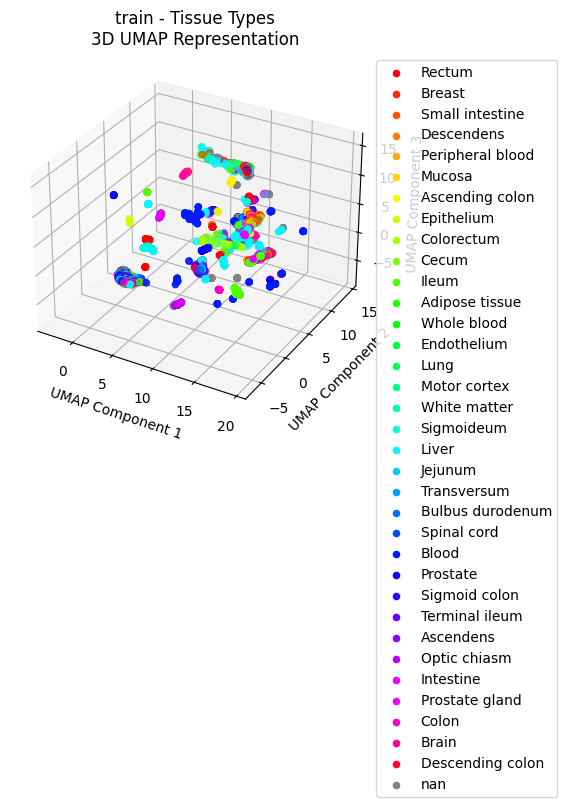

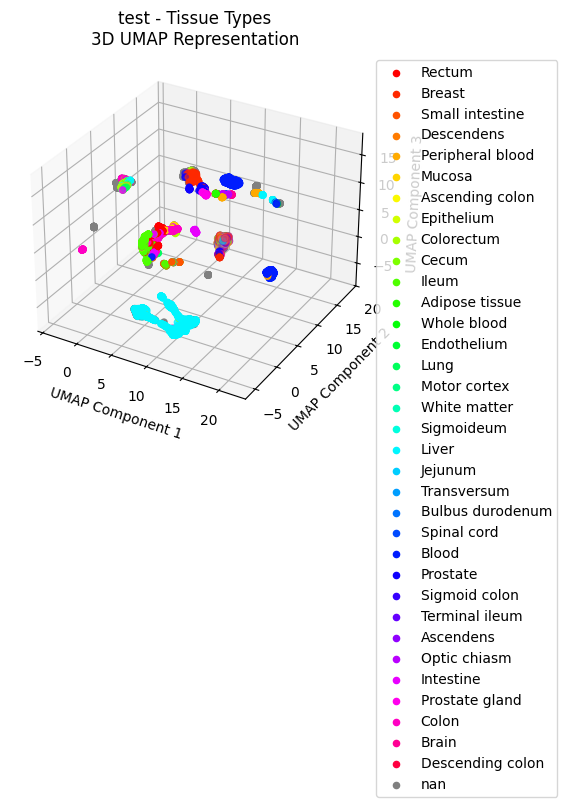

In [122]:
for data_type in ["train", "test"]:
    if data_type == "train":
        adata = adata_train
        embeddings = umap_embeddings_train
    else:
        adata = adata_test
        embeddings = umap_embeddings_test

    labels = adata.obs["celltype"].to_list()
    unique_labels = list(set(labels))
    unique_labels.sort()

    labels = adata_test.obs["tissue"].to_list()

    unique_labels = list(set(labels))

    # Get a color map
    cmap = plt.get_cmap("hsv")

    # Generate a unique color for each unique label
    colors = [cmap(i / len(unique_labels)) for i in range(len(unique_labels))]

    # Create a mapping from unique labels to colors
    label_color_map = {
        label: color
        for label, color in zip(unique_labels, colors)
        if str(label) != "nan"
    }
    label_color_map.update({"nan": (0.5, 0.5, 0.5, 1.0)})

    # Map the labels to their corresponding colors
    assigned_colors = list()
    for label in labels:
        assigned_colors.append(label_color_map[label])
    assigned_colors = np.array(assigned_colors)

    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Scatter plot with colors
    nan_idxs = [i for i, label in enumerate(labels) if str(label) == "nan"]
    t_idxs = [i for i, label in enumerate(labels) if str(label) != "nan"]

    ax.scatter(
        embeddings[t_idxs, 0],
        embeddings[t_idxs, 1],
        embeddings[t_idxs, 2],
        c=assigned_colors[t_idxs],
    )

    ax.scatter(
        embeddings[nan_idxs, 0],
        embeddings[nan_idxs, 1],
        embeddings[nan_idxs, 2],
        c=assigned_colors[nan_idxs],
        alpha=1,
    )

    # Adding legend
    for label in label_color_map:
        ax.scatter([], [], [], c=label_color_map[label], label=label)
    ax.legend(loc="upper right", bbox_to_anchor=(1.5, 1))

    # Set labels
    ax.set_xlabel("UMAP Component 1")
    ax.set_ylabel("UMAP Component 2")
    ax.set_zlabel("UMAP Component 3")
    ax.set_title(f"{data_type} - Tissue Types\n3D UMAP Representation")

    # Display the plot
    plt.savefig(
        os.path.join(output_dir, f"{data_type}.umap_3d.tissue_types.png"),
        dpi=300,
        bbox_inches="tight",
    )

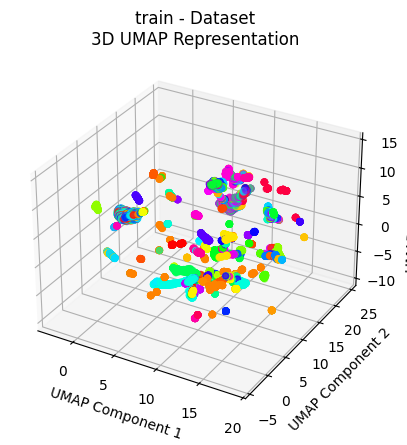

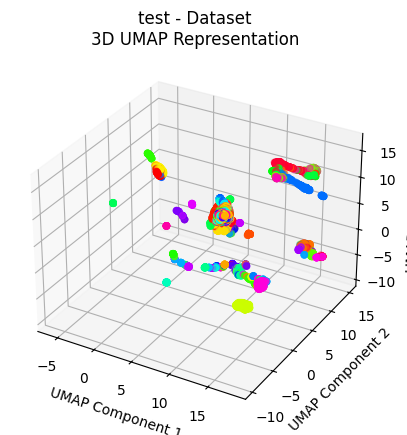

In [50]:
for data_type in ["train", "test"]:
    if data_type == "train":
        adata = adata_train
        embeddings = umap_embeddings_train
    else:
        adata = adata_test
        embeddings = umap_embeddings_test

    labels = adata.obs["dataset"].to_list()

    unique_labels = list(set(labels))

    # Get a color map
    cmap = plt.get_cmap("hsv")

    # Generate a unique color for each unique label
    colors = [cmap(i / len(unique_labels)) for i in range(len(unique_labels))]

    # Create a mapping from unique labels to colors
    label_color_map = {
        label: color
        for label, color in zip(unique_labels, colors)
        if str(label) != "nan"
    }
    label_color_map.update({"nan": (0.5, 0.5, 0.5, 1.0)})

    # Map the labels to their corresponding colors
    assigned_colors = list()
    for label in labels:
        assigned_colors.append(label_color_map[label])

    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Scatter plot with colors
    ax.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=assigned_colors)

    # Adding legend
    # for label in label_color_map:
    #     ax.scatter([], [], [], c=label_color_map[label], label=label)
    # ax.legend(loc="upper right", bbox_to_anchor=(1.5, 1))

    # Set labels
    ax.set_xlabel("UMAP Component 1")
    ax.set_ylabel("UMAP Component 2")
    ax.set_zlabel("UMAP Component 3")
    ax.set_title(f"{data_type} - Dataset\n3D UMAP Representation")

    # Display the plot
    plt.savefig(
        os.path.join(output_dir, f"{data_type}.umap_3d.dataset.png"),
        dpi=300,
        bbox_inches="tight",
    )

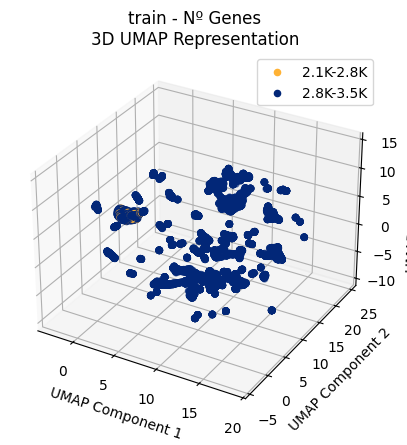

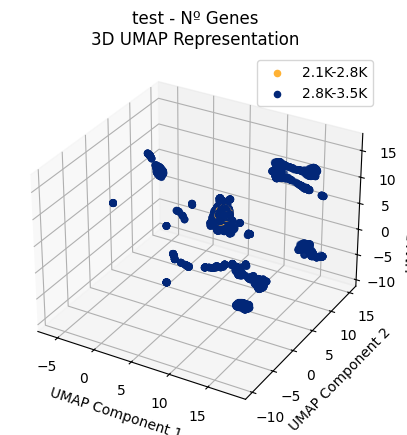

In [49]:
def format_number(n):
    """Format the number to include 'K' for thousands."""
    if n >= 1000:
        return f"{n/1000:.1f}K"
    return str(n)


def get_groups_by_counts(
    data,
    max_genes,
    n_groups=4,
):
    labels = list()
    bins = np.arange(0, max_genes + 1, max_genes / n_groups)
    formatted_bins = [format_number(bin) for bin in bins]

    for n_genes in data:
        for i, bin in enumerate(bins):
            if i == 0:
                label = f"<={formatted_bins[i]}"
            else:
                label = f"{formatted_bins[i-1]}-{formatted_bins[i]}"
            if n_genes <= bin:
                labels.append(label)
                break

    return labels


for data_type in ["train", "test"]:
    if data_type == "train":
        adata = adata_train
        embeddings = umap_embeddings_train
    else:
        adata = adata_test
        embeddings = umap_embeddings_test

    n_genes = (~np.isnan(adata.X)).sum(axis=1)
    labels = get_groups_by_counts(n_groups=5, max_genes=max(n_genes), data=n_genes)
    unique_labels = set(labels)

    label_color_map = {
        k: v
        for k, v in zip(
            unique_labels, [irb_colors[0], irb_colors[4], irb_colors[2], irb_colors[1]]
        )
    }
    colors = [label_color_map.get(label, "grey") for label in labels]

    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Scatter plot with colors
    ax.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors)

    # Adding legend
    for label in label_color_map:
        ax.scatter([], [], [], c=label_color_map[label], label=label)
    ax.legend()

    # Set labels
    ax.set_xlabel("UMAP Component 1")
    ax.set_ylabel("UMAP Component 2")
    ax.set_zlabel("UMAP Component 3")
    ax.set_title(f"{data_type} - Nº Genes\n3D UMAP Representation")

    # Display the plot
    plt.savefig(
        os.path.join(output_dir, f"{data_type}.umap_3d.n_genes.png"),
        dpi=300,
        bbox_inches="tight",
    )

## Plot Distances/Similarities

In [92]:
# compute cosine similarity matrix, pdist and cdist
from scipy.spatial.distance import cosine
from scipy.spatial.distance import pdist, cdist

# cosine similarity matrix
c_matrix_test = 1 - cdist(
    scgpt_emb_test, scgpt_emb_test, "cosine"
)  # 1 - cosine distance
c_matrix_train = 1 - cdist(scgpt_emb_train, scgpt_emb_train, "cosine")

# euclidean distance matrix
e_matrix_test = cdist(scgpt_emb_test, scgpt_emb_test, "euclidean")
e_matrix_train = cdist(scgpt_emb_train, scgpt_emb_train, "euclidean")

# pearson correlation matrix
p_matrix_test = 1 - cdist(
    scgpt_emb_test, scgpt_emb_test, "correlation"
)  # 1 - correlation distance
p_matrix_train = 1 - cdist(scgpt_emb_train, scgpt_emb_train, "correlation")

In [88]:
def get_grouped_ps(matrix: np.array, idxs: np.array, labels: List) -> Dict:
    """Get Grouped Pairwise Similarities
    Args:
        matrix (np.array): Pairwise similarity matrix
        idxs (List): List of indexes
        labels (List): List of labels
    Returns:
        grouped_ps (Dict): Dictionary with grouped pairwise similarities
    """
    grouped_ps = dict()
    label_idxs = list(range(len(labels)))
    for i, idx_i in enumerate(label_idxs):
        for idx_j in label_idxs[i:]:
            label_i = labels[idx_i]
            label_j = labels[idx_j]

            if idx_i == idx_j:
                grouped_ps[f"{label_i}-{label_j}"] = get_pairwise_similarities(
                    matrix, idxs[idx_i]
                )
            else:
                grouped_ps[f"{label_i}-{label_j}"] = get_pairwise_similarities(
                    matrix, idxs[idx_i], idxs[idx_j]
                )
    return grouped_ps

Control: 541
Disease: 661
Control: 493
Disease: 430


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x73b1e4a38970>>
Traceback (most recent call last):
  File "/home/ddalton/miniconda3/envs/scgpt/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


Control: 674
Disease: 869
Control: 100
Disease: 146
Control: 101
Disease: 614
Control: 197
Disease: 497


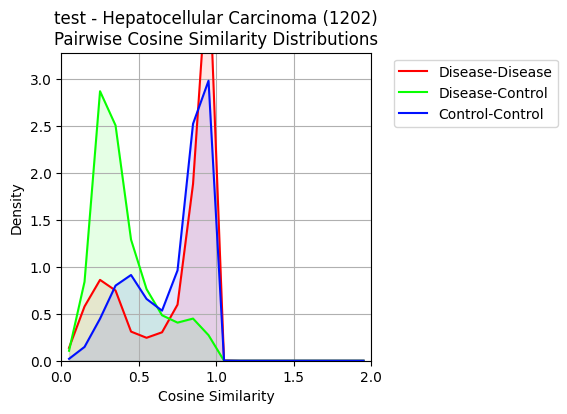

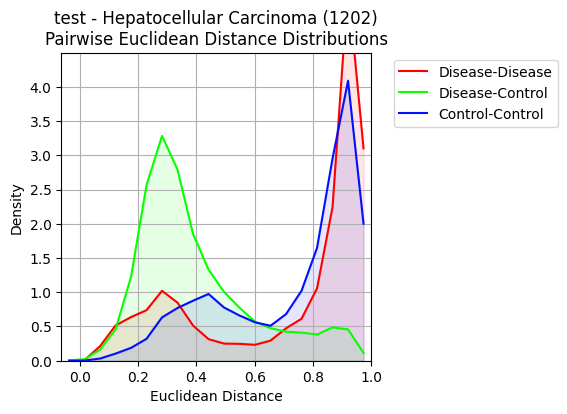

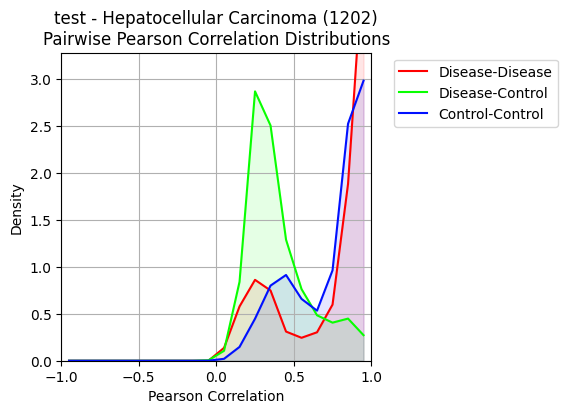

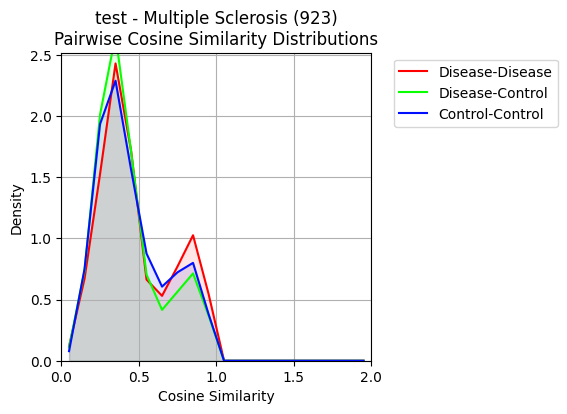

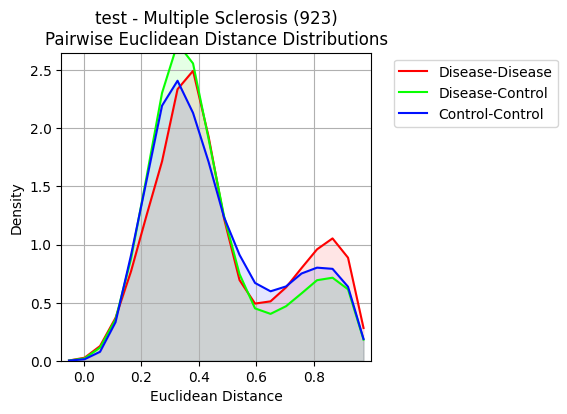

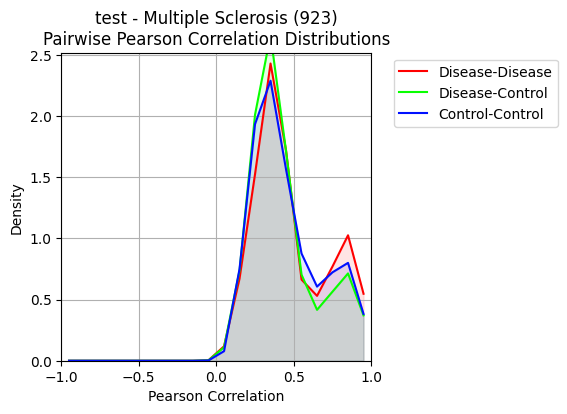

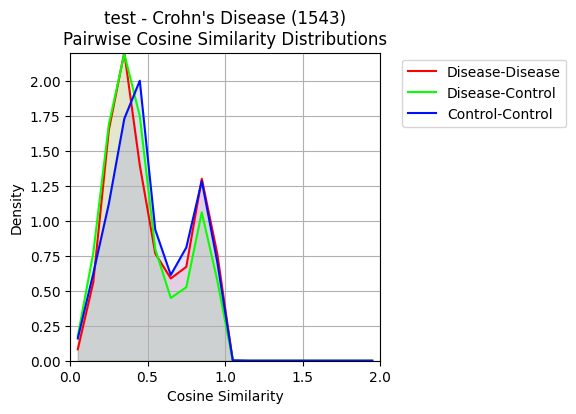

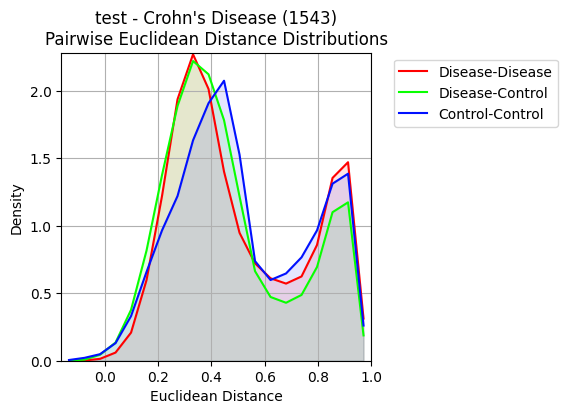

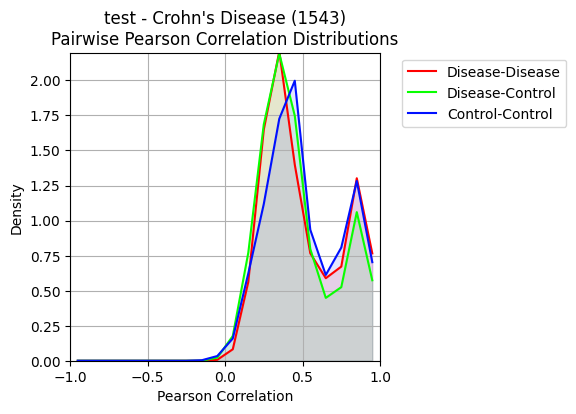

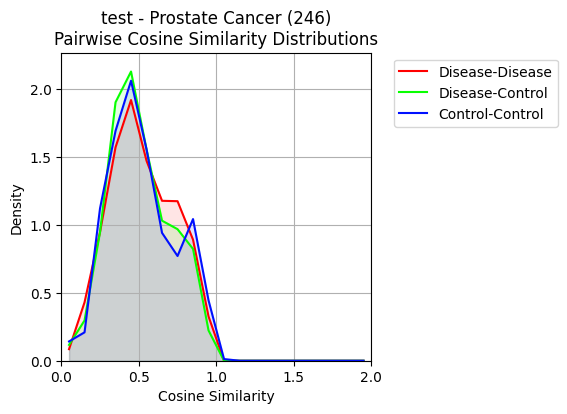

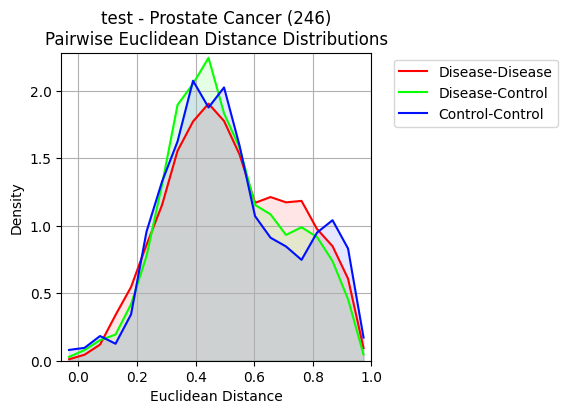

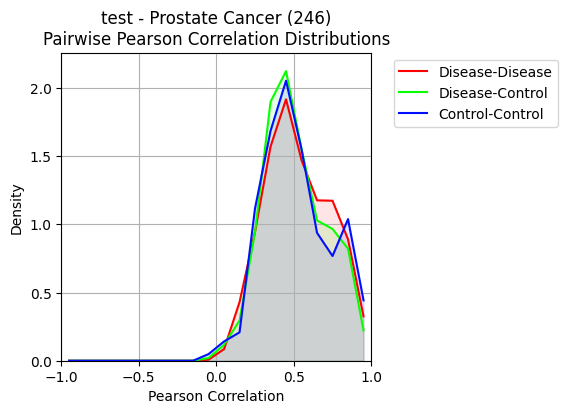

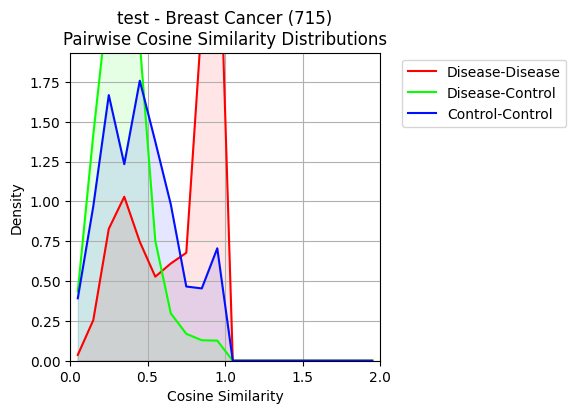

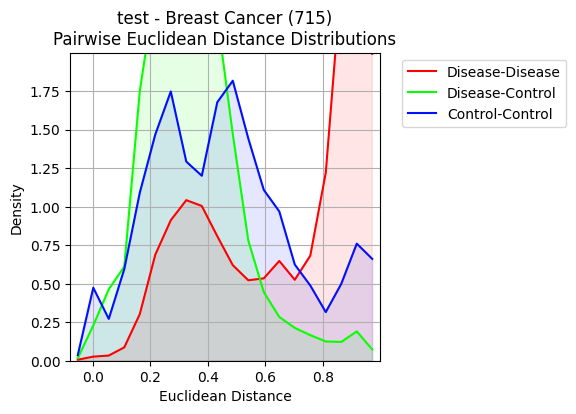

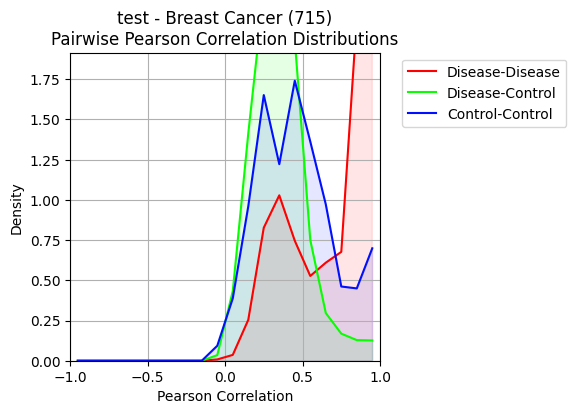

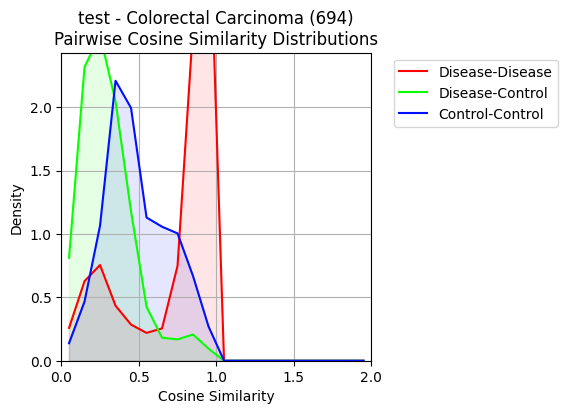

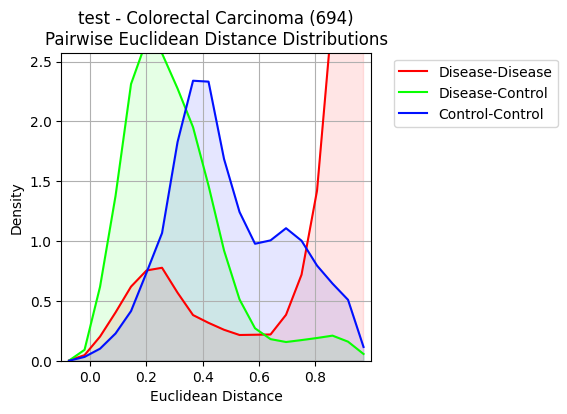

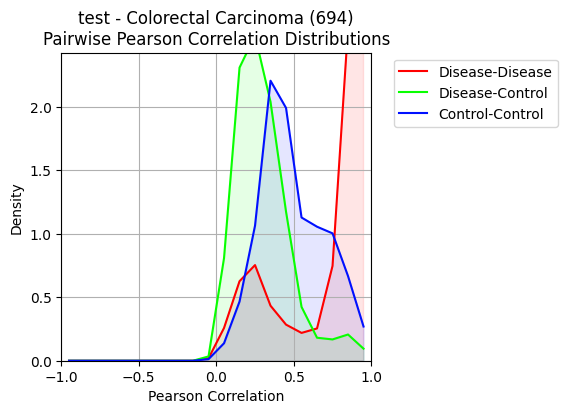

In [89]:
for data_type in ["test"]:

    if data_type == "train":
        adata = adata_train
        c_matrix = c_matrix_train
        e_matrix = e_matrix_train
        p_matrix = p_matrix_train
    else:
        adata = adata_test
        c_matrix = c_matrix_test
        e_matrix = e_matrix_test
        p_matrix = p_matrix_test

    # Compute pairwise similarities for each disease
    for disease_it in adata.obs["disease_study"].unique():

        # get disease & control indexes
        disease_idxs = list()
        control_idxs = list()
        for i, (disease, disease_study) in enumerate(
            zip(adata.obs["disease"].to_list(), adata.obs["disease_study"].to_list())
        ):
            if (disease == disease_it) & (disease_study == disease_it):
                disease_idxs.append(i)
            elif (disease == "Control") & (disease_study == disease_it):
                control_idxs.append(i)

        print(f"Control: {len(control_idxs)}")
        print(f"Disease: {len(disease_idxs)}")
        n_samples = len(disease_idxs) + len(control_idxs)
        # Plot Metrics
        for metric, matrix in zip(
            ["Cosine Similarity", "Euclidean Distance", "Pearson Correlation"],
            [c_matrix, e_matrix, p_matrix],
        ):

            d_ps = get_grouped_ps(
                c_matrix, [disease_idxs, control_idxs], ["Disease", "Control"]
            )

            plot_metrics(
                d_ps.values(),
                d_ps.keys(),
                metric,
                title=f"{data_type} - {disease_it} ({n_samples})",
                output_txt=f"{data_type}_{disease_it.replace(' ','_')}.control_vs_disease",
                save=True,
            )

Control: 541
Disease: 661


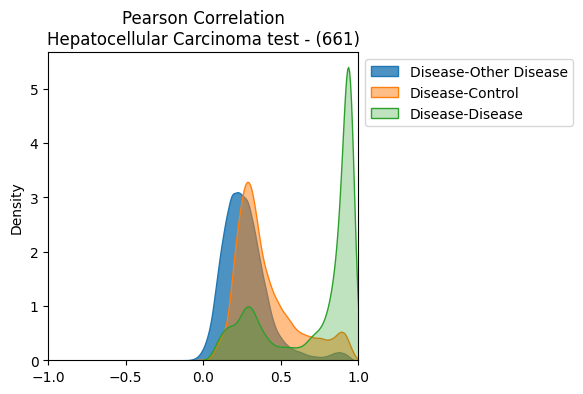

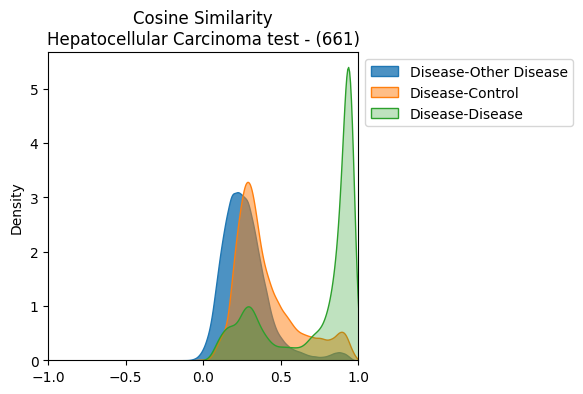

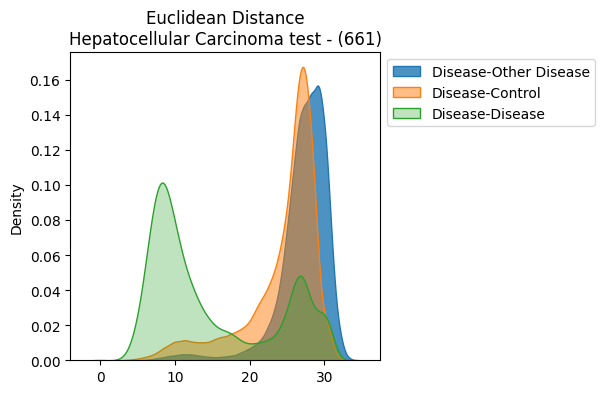

In [111]:
metric_params = {
    "Cosine Similarity": (-1, 1),
    "Euclidean Distance": (None, None),  # Empty tuple if you don't want to set bounds
    "Pearson Correlation": (-1, 1),
}


# for data_type in ["train", "test"]:
for data_type in ["test", "train"]:

    if data_type == "train":
        adata = adata_train
        c_matrix = c_matrix_train
        e_matrix = e_matrix_train
        p_matrix = p_matrix_train
    else:
        adata = adata_test
        c_matrix = c_matrix_test
        e_matrix = e_matrix_test
        p_matrix = p_matrix_test

    # Compute pairwise similarities for each disease
    for disease_it in adata.obs["disease_study"].unique():

        # get disease & control indexes
        disease_idxs = list()
        control_idxs = list()
        other_disease_idxs = list()
        for i, (disease, disease_study) in enumerate(
            zip(adata.obs["disease"].to_list(), adata.obs["disease_study"].to_list())
        ):
            if (disease == disease_it) & (disease_study == disease_it):
                disease_idxs.append(i)
            elif (disease == "Control") & (disease_study == disease_it):
                control_idxs.append(i)
            elif disease != disease_study:
                other_disease_idxs.append(i)

        print(f"Control: {len(control_idxs)}")
        print(f"Disease: {len(disease_idxs)}")
        n_samples = len(disease_idxs)
        # Plot Metrics
        for metric, matrix in zip(
            [
                "Pearson Correlation",
                "Cosine Similarity",
                "Euclidean Distance",
            ],
            [p_matrix, c_matrix, e_matrix],
        ):

            d_ps = get_grouped_ps(
                matrix,
                [disease_idxs, control_idxs, other_disease_idxs],
                ["Disease", "Control", "Other Disease"],
            )

            d_data = {k: v for k, v in d_ps.items() if k.startswith("Disease-")}

            plt.figure(figsize=(4, 4))

            sns.kdeplot(
                d_data["Disease-Other Disease"],
                label="Disease-Other Disease",
                fill=True,
                alpha=0.8,
            )
            sns.kdeplot(
                d_data["Disease-Control"], label="Disease-Control", fill=True, alpha=0.5
            )
            sns.kdeplot(
                d_data["Disease-Disease"], label="Disease-Disease", fill=True, alpha=0.3
            )
            plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
            plt.title(f"{metric}\n{disease_it} {data_type} - ({n_samples})")
            plt.xlim(metric_params[metric])

            # only one metric
        break
    break

In [94]:
c_matrix_test

array([[1.        , 0.99324301, 0.92164718, ..., 0.40070425, 0.38942855,
        0.42814108],
       [0.99324301, 1.        , 0.90260425, ..., 0.39190649, 0.38516918,
        0.42177076],
       [0.92164718, 0.90260425, 1.        , ..., 0.38478073, 0.37238066,
        0.41848797],
       ...,
       [0.40070425, 0.39190649, 0.38478073, ..., 1.        , 0.96743285,
        0.94200175],
       [0.38942855, 0.38516918, 0.37238066, ..., 0.96743285, 1.        ,
        0.9596637 ],
       [0.42814108, 0.42177076, 0.41848797, ..., 0.94200175, 0.9596637 ,
        1.        ]])

## Plot Different Latent Spaces

In [66]:
# compute cosine similarity matrix, pdist and cdist
from scipy.spatial.distance import cosine
from scipy.spatial.distance import pdist, cdist

# cosine similarity matrix
c_matrix_scgpt_test = 1 - cdist(
    scgpt_emb_test, scgpt_emb_test, "cosine"
)  # 1 - cosine distance

raw_expr_patched = 
c_matrix_raw_test = 1 - cdist(
    np.nan_to_num(adata_test.X, nan=0), np.nan_to_num(adata_test.X, nan=0), "cosine"
)  # 1 - cosine distance

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import random

# Example data (replace with your actual data)
labels = adata_test.obs["disease"].to_list()
matrix_A = c_matrix_scgpt_test
matrix_B = c_matrix_raw_test


def get_pair_idxs(labels, same=True):
    n_labels = len(labels)
    output_idxs = list()
    output_labels = list()
    if same:
        for i in range(n_labels):
            for j in range(i + 1, n_labels):
                if labels[i] == labels[j]:
                    output_idxs.append([i, j])
                    output_labels.append(labels[i] + "-" + labels[j])
    else:
        for i in range(n_labels):
            for j in range(i + 1, n_labels):
                if labels[i] != labels[j]:
                    output_idxs.append([i, j])
                    output_labels.append(labels[i] + "-" + labels[j])

    output_idxs = np.array(output_idxs)
    output_labels = np.array(output_labels)

    return output_idxs, output_labels


same_idxs, same_labels = get_pair_idxs(labels, same=True)
diff_idxs, random_labels = get_pair_idxs(labels, same=False)

data_same_A = matrix_A[same_idxs[:, 0], same_idxs[:, 1]]
data_same_B = matrix_B[same_idxs[:, 0], same_idxs[:, 1]]

colormap = plt.cm.get_cmap(
    "gist_rainbow", len(set(same_labels))
)  # You can change "tab20" to any other colormap

/tmp/ipykernel_7441/3966013533.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap(


/tmp/ipykernel_7441/850300922.py:53: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y, ax=y_kde_ax, color="green", vertical=True, fill=True)


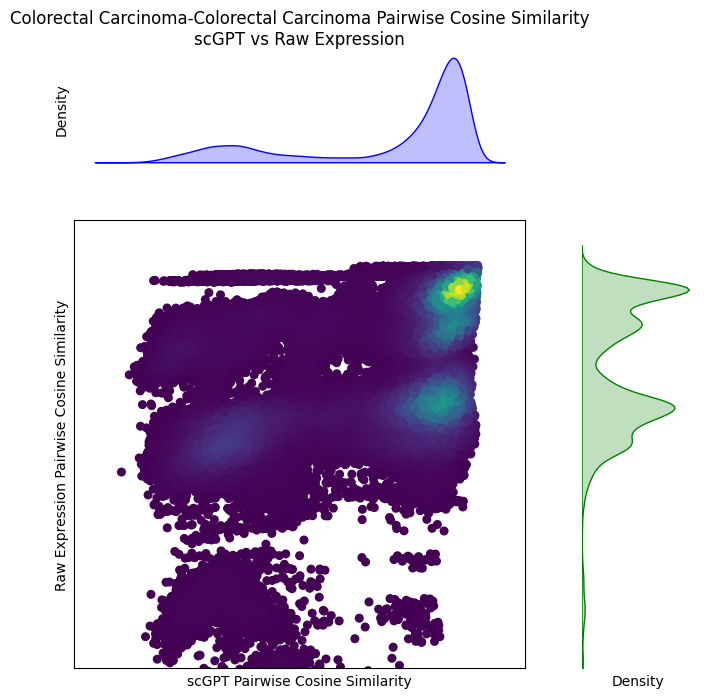

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
import random

plt.figure(figsize=(8, 8))

# Define a grid for the plot layout
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.5)

# Scatter plot will go in the main panel (bottom-right)
main_ax = plt.subplot(grid[1:, :-1])

# KDE plots for Matrix A on top (x-axis KDE)
x_kde_ax = plt.subplot(grid[0, :-1], sharex=main_ax)

# KDE plots for Matrix B on the right (y-axis KDE)
y_kde_ax = plt.subplot(grid[1:, -1], sharey=main_ax)

# Plot the same-label data points with different colors
for i, label in enumerate(set(same_labels)):
    label == "Breast Cancer-Breast"

    data_idxs = same_labels == label

    x = data_same_A[data_idxs]
    y = data_same_B[data_idxs]

    # Combine all points into a 2D array for density estimation
    xy = np.vstack([x, y])
    density = gaussian_kde(xy)(xy)

    # Normalize density values to [0, 1] for coloring
    density_norm = (density - density.min()) / (density.max() - density.min())

    # Define a colormap for the scatter plot
    colormap = plt.cm.viridis

    # Scatter plot in the main axis
    main_ax.scatter(
        data_same_A[data_idxs],
        data_same_B[data_idxs],
        label=label,
        c=density_norm,  # Color by normalized density
        cmap=colormap,
        marker="o",
        s=30,
    )

    # Plot the KDE for Matrix A (x-axis) on the top subplot
    sns.kdeplot(x, ax=x_kde_ax, color="blue", fill=True)

    # Plot the KDE for Matrix B (y-axis) on the right subplot
    sns.kdeplot(y, ax=y_kde_ax, color="green", vertical=True, fill=True)

    # Remove ticks and boxes from the KDE plots
    x_kde_ax.set_xticks([])
    x_kde_ax.set_yticks([])
    x_kde_ax.spines["top"].set_visible(False)
    x_kde_ax.spines["right"].set_visible(False)
    x_kde_ax.spines["left"].set_visible(False)
    x_kde_ax.spines["bottom"].set_visible(False)
    x_kde_ax.set_ylim(
        -0.1,
    )
    x_kde_ax.set_title(f"{label} Pairwise Cosine Similarity\nscGPT vs Raw Expression")

    y_kde_ax.set_xticks([])
    y_kde_ax.set_yticks([])
    y_kde_ax.spines["top"].set_visible(False)
    y_kde_ax.spines["right"].set_visible(False)
    y_kde_ax.spines["left"].set_visible(False)
    y_kde_ax.spines["bottom"].set_visible(False)
    y_kde_ax.set_ylim(
        -0.1,
    )

    # Final plot settings
    main_ax.set_xlabel("scGPT Pairwise Cosine Similarity")
    main_ax.set_ylabel("Raw Expression Pairwise Cosine Similarity")

    break  # Assuming you want to do this for one label only, hence the break.

plt.show()

/tmp/ipykernel_7441/2745416307.py:56: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y, ax=y_kde_ax, color="green", fill=True, vertical=True)


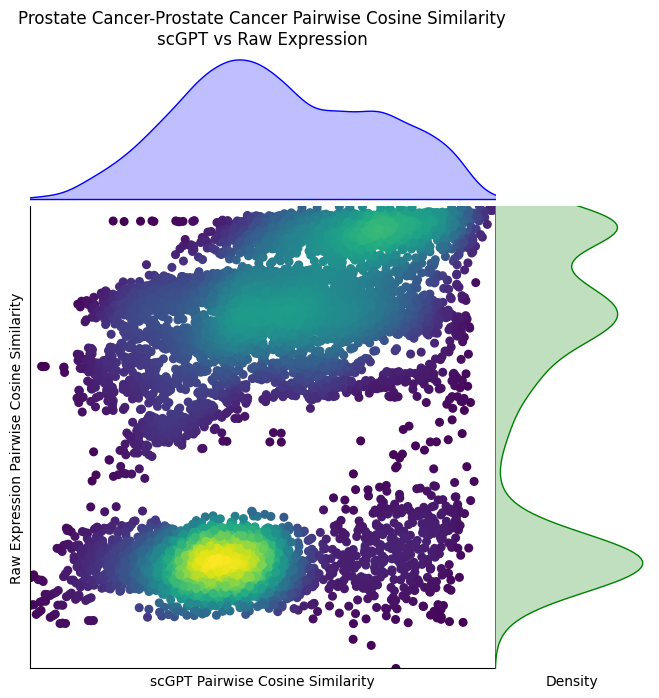

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
import random

plt.figure(figsize=(8, 8))

# Define a grid for the plot layout
grid = plt.GridSpec(
    4, 4, hspace=0, wspace=0
)  # Set hspace and wspace to 0 for seamless plots

# Scatter plot will go in the main panel (bottom-right)
main_ax = plt.subplot(grid[1:, :-1])

# KDE plots for Matrix A on top (x-axis KDE)
x_kde_ax = plt.subplot(grid[0, :-1], sharex=main_ax)

# KDE plots for Matrix B on the right (y-axis KDE)
y_kde_ax = plt.subplot(grid[1:, -1], sharey=main_ax)

# Plot the same-label data points with different colors
for i, label in enumerate(set(same_labels)):
    label = "Prostate Cancer-Prostate Cancer"

    data_idxs = same_labels == label

    x = data_same_A[data_idxs]
    y = data_same_B[data_idxs]

    # Combine all points into a 2D array for density estimation
    xy = np.vstack([x, y])
    density = gaussian_kde(xy)(xy)

    # Normalize density values to [0, 1] for coloring
    density_norm = (density - density.min()) / (density.max() - density.min())

    # Define a colormap for the scatter plot
    colormap = plt.cm.viridis

    # Scatter plot in the main axis
    main_ax.scatter(
        data_same_A[data_idxs],
        data_same_B[data_idxs],
        c=density_norm,  # Color by normalized density
        cmap=colormap,
        marker="o",
        s=30,
    )

    # Plot the KDE for Matrix A (x-axis) on the top subplot
    sns.kdeplot(x, ax=x_kde_ax, color="blue", fill=True)

    # Plot the KDE for Matrix B (y-axis) on the right subplot
    sns.kdeplot(y, ax=y_kde_ax, color="green", fill=True, vertical=True)

    # Remove ticks and boxes from the KDE plots
    x_kde_ax.set_xticks([])
    x_kde_ax.set_yticks([])
    x_kde_ax.spines["top"].set_visible(False)
    x_kde_ax.spines["right"].set_visible(False)
    x_kde_ax.spines["left"].set_visible(False)
    x_kde_ax.spines["bottom"].set_visible(False)
    x_kde_ax.set_ylim(
        -0.1,
    )
    x_kde_ax.set_ylabel("")
    x_kde_ax.set_title(f"{label} Pairwise Cosine Similarity\nscGPT vs Raw Expression")

    y_kde_ax.set_xticks([])
    y_kde_ax.set_yticks([])
    y_kde_ax.spines["top"].set_visible(False)
    y_kde_ax.spines["right"].set_visible(False)
    y_kde_ax.spines["left"].set_visible(False)
    y_kde_ax.spines["bottom"].set_visible(False)
    y_kde_ax.set_ylabel("")
    y_kde_ax.set_ylim(
        -0.1,
    )

    # Remove ticks from the main scatter plot
    main_ax.tick_params(left=True, bottom=True)

    main_ax.set_xlabel("scGPT Pairwise Cosine Similarity")
    main_ax.set_ylabel("Raw Expression Pairwise Cosine Similarity")
    main_ax.set_ylim(min(y), max(y))
    main_ax.set_xlim(min(x), max(x))
    main_ax.spines["top"].set_visible(False)
    main_ax.spines["right"].set_visible(False)

    plt.show()
    break  # Assuming you want to do this for one label only, hence the break.

/tmp/ipykernel_7441/1196081269.py:55: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y, ax=y_kde_ax, color="green", fill=True, vertical=True)


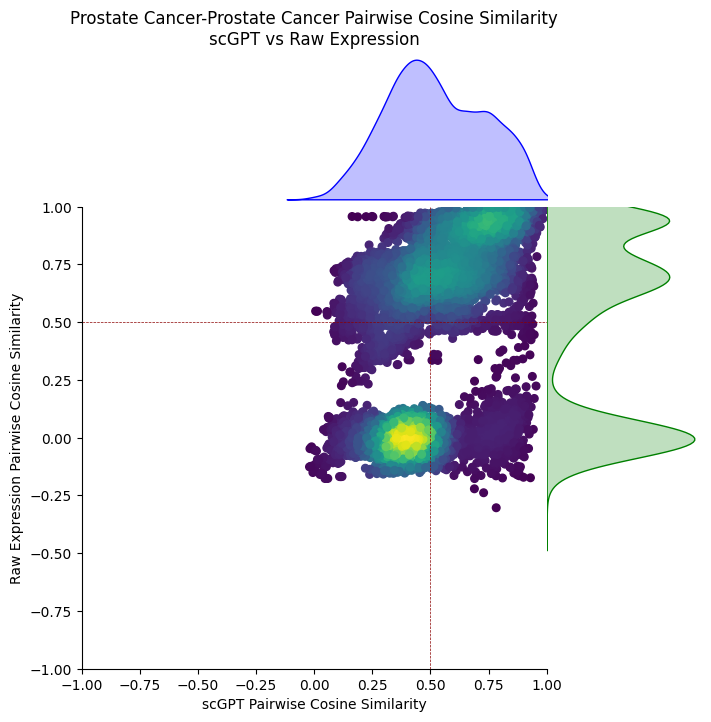

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

plt.figure(figsize=(8, 8))

# Define a grid for the plot layout
grid = plt.GridSpec(
    4, 4, hspace=0, wspace=0
)  # Set hspace and wspace to 0 for seamless plots

# Scatter plot will go in the main panel (bottom-right)
main_ax = plt.subplot(grid[1:, :-1])

# KDE plots for Matrix A on top (x-axis KDE)
x_kde_ax = plt.subplot(grid[0, :-1], sharex=main_ax)

# KDE plots for Matrix B on the right (y-axis KDE)
y_kde_ax = plt.subplot(grid[1:, -1], sharey=main_ax)

# Plot the same-label data points with different colors
for i, label in enumerate(set(same_labels)):
    label = "Colorectal Carcinoma-Colorectal Carcinoma"

    data_idxs = same_labels == label

    x = data_same_A[data_idxs]
    y = data_same_B[data_idxs]

    # Combine all points into a 2D array for density estimation
    xy = np.vstack([x, y])
    density = gaussian_kde(xy)(xy)

    # Normalize density values to [0, 1] for coloring
    density_norm = (density - density.min()) / (density.max() - density.min())

    # Define a colormap for the scatter plot
    colormap = plt.cm.viridis

    # Scatter plot in the main axis
    main_ax.scatter(
        data_same_A[data_idxs],
        data_same_B[data_idxs],
        c=density_norm,  # Color by normalized density
        cmap=colormap,
        marker="o",
        s=30,
    )

    # Plot the KDE for Matrix A (x-axis) on the top subplot
    sns.kdeplot(x, ax=x_kde_ax, color="blue", fill=True)

    # Plot the KDE for Matrix B (y-axis) on the right subplot
    sns.kdeplot(y, ax=y_kde_ax, color="green", fill=True, vertical=True)

    # Remove ticks and boxes from the KDE plots
    # x_kde_ax.set_xticks([])
    x_kde_ax.set_yticks([])
    x_kde_ax.spines["top"].set_visible(False)
    x_kde_ax.spines["right"].set_visible(False)
    x_kde_ax.spines["left"].set_visible(False)
    x_kde_ax.spines["bottom"].set_visible(False)
    x_kde_ax.set_ylim(-0.1)
    x_kde_ax.set_ylabel("")
    x_kde_ax.set_title(f"{label} Pairwise Cosine Similarity\nscGPT vs Raw Expression")

    y_kde_ax.set_xticks([])
    # y_kde_ax.set_yticks([])
    y_kde_ax.spines["top"].set_visible(False)
    y_kde_ax.spines["right"].set_visible(False)
    y_kde_ax.spines["left"].set_visible(False)
    y_kde_ax.spines["bottom"].set_visible(False)
    y_kde_ax.set_xlabel("")
    y_kde_ax.set_ylim(-0.1)

    # Re-enable ticks on the main scatter plot

    main_ax.set_xlabel("scGPT Pairwise Cosine Similarity")
    main_ax.set_ylabel("Raw Expression Pairwise Cosine Similarity")
    # main_ax.set_ylim(min(min(y), min(x)), max(max(y), max(x)))
    # main_ax.set_xlim(min(min(y), min(x)), max(max(y), max(x)))
    main_ax.spines["top"].set_visible(False)
    main_ax.spines["right"].set_visible(False)
    main_ax.set_ylim(-1, 1)
    main_ax.set_xlim(-1, 1)
    main_ax.tick_params(left=True, bottom=True)
    main_ax.hlines(0.5, -1, 1, color="darkred", linestyle="--", linewidth=0.5)
    main_ax.vlines(0.5, -1, 1, color="darkred", linestyle="--", linewidth=0.5)

    plt.setp(x_kde_ax.get_xticklabels(), visible=False)
    plt.setp(y_kde_ax.get_yticklabels(), visible=False)

    x_kde_ax.tick_params(axis="x", which="both", length=0)  # Removes the tick lines
    y_kde_ax.tick_params(axis="y", which="both", length=0)  # Removes the tick lines

    plt.show()
    break  # Assuming you want to do this for one label only, hence the break.

In [191]:
set(same_labels)

{'Breast Cancer-Breast Cancer',
 'Colorectal Carcinoma-Colorectal Carcinoma',
 'Control-Control',
 "Crohn's Disease-Crohn's Disease",
 'Hepatocellular Carcinoma-Hepatocellular Carcinoma',
 'Multiple Sclerosis-Multiple Sclerosis',
 'Prostate Cancer-Prostate Cancer'}

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

plt.figure(figsize=(8, 8))

# Define a grid for the plot layout
grid = plt.GridSpec(
    4, 4, hspace=0, wspace=0
)  # Set hspace and wspace to 0 for seamless plots

# Scatter plot will go in the main panel (bottom-right)
main_ax = plt.subplot(grid[1:, :-1])

# KDE plots for Matrix A on top (x-axis KDE)
x_kde_ax = plt.subplot(grid[0, :-1], sharex=main_ax)

# KDE plots for Matrix B on the right (y-axis KDE)
y_kde_ax = plt.subplot(grid[1:, -1], sharey=main_ax)

# Plot the same-label data points with different colors
for i, label in enumerate(set(same_labels)):
    label = "Prostate Cancer-Prostate Cancer"

    data_idxs = same_labels == label

    x = data_same_A[data_idxs]
    y = data_same_B[data_idxs]

    # Combine all points into a 2D array for density estimation
    xy = np.vstack([x, y])
    density = gaussian_kde(xy)(xy)

    # Normalize density values to [0, 1] for coloring
    density_norm = (density - density.min()) / (density.max() - density.min())

    # Define a colormap for the scatter plot
    colormap = plt.cm.viridis

    # Scatter plot in the main axis
    main_ax.scatter(
        data_same_A[data_idxs],
        data_same_B[data_idxs],
        c=density_norm,  # Color by normalized density
        cmap=colormap,
        marker="o",
        s=30,
    )

    # Plot the KDE for Matrix A (x-axis) on the top subplot
    sns.kdeplot(x, ax=x_kde_ax, color="blue", fill=True)

    # Plot the KDE for Matrix B (y-axis) on the right subplot
    sns.kdeplot(y, ax=y_kde_ax, color="green", fill=True, vertical=True)

    # Remove ticks and boxes from the KDE plots
    x_kde_ax.set_xticks([])
    x_kde_ax.set_yticks([])
    x_kde_ax.spines["top"].set_visible(False)
    x_kde_ax.spines["right"].set_visible(False)
    x_kde_ax.spines["left"].set_visible(False)
    x_kde_ax.spines["bottom"].set_visible(False)
    x_kde_ax.set_ylim(-0.1)
    x_kde_ax.set_ylabel("")
    x_kde_ax.set_title(f"{label} Pairwise Cosine Similarity\nscGPT vs Raw Expression")

    y_kde_ax.tick_params(left=False, bottom=False, top=False, right=False)
    x_kde_ax.set_xticks([])
    x_kde_ax.set_yticks([])
    y_kde_ax.spines["top"].set_visible(False)
    y_kde_ax.spines["right"].set_visible(False)
    y_kde_ax.spines["left"].set_visible(False)
    y_kde_ax.spines["bottom"].set_visible(False)
    y_kde_ax.set_ylabel("")
    y_kde_ax.set_ylim(-0.1)

    # Re-enable ticks on the main scatter plot

    main_ax.set_xlabel("scGPT Pairwise Cosine Similarity")
    main_ax.set_ylabel("Raw Expression Pairwise Cosine Similarity")
    main_ax.set_ylim(min(y), max(y))
    main_ax.set_xlim(min(x), max(x))
    main_ax.spines["top"].set_visible(False)
    main_ax.spines["right"].set_visible(False)
    main_ax.tick_params(left=False, bottom=False, right=False, top=False)

    plt.show()
    break  # Assuming you want to do this for one label only, hence the break.

In [137]:
from collections import Counter

Counter(same_labels)

Counter({'Control-Control': 2216565,
         "Crohn's Disease-Crohn's Disease": 377146,
         'Hepatocellular Carcinoma-Hepatocellular Carcinoma': 218130,
         'Breast Cancer-Breast Cancer': 188191,
         'Colorectal Carcinoma-Colorectal Carcinoma': 123256,
         'Multiple Sclerosis-Multiple Sclerosis': 92235,
         'Prostate Cancer-Prostate Cancer': 10585})

In [ ]:
def get_pairwise_similarities(matrix, indexes_1, indexes_2=None):

    pairs = list()
    if indexes_2 is not None:

        for i in indexes_1:
            for j in indexes_2:
                pairs.append([i, j])

        pairs = np.array(pairs)
        return matrix[pairs[:, 0], pairs[:, 1]]

    else:
        for n, i in enumerate(indexes_1):
            for j in indexes_1[n + 1 :]:
                pairs.append([i, j])

        pairs = np.array(pairs)
        return matrix[pairs[:, 0], pairs[:, 1]]


m1 = get_pairwise_similarities(cosine_matrix, disease_idxs)

<Axes: ylabel='Density'>

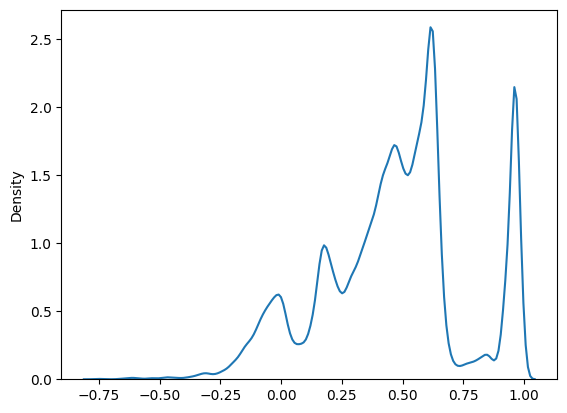

In [86]:
sns.kdeplot(y)

In [81]:
set(same_labels)

{'Breast Cancer-Breast Cancer',
 'Colorectal Carcinoma-Colorectal Carcinoma',
 'Control-Control',
 "Crohn's Disease-Crohn's Disease",
 'Hepatocellular Carcinoma-Hepatocellular Carcinoma',
 'Multiple Sclerosis-Multiple Sclerosis',
 'Prostate Cancer-Prostate Cancer'}

## MLP Prediction


In [24]:
"""MLP Prediction

Structure:  
    1. Imports, Variables, Functions
    2. Define Splits
    3. Train MLP
    4. Evaluate MLP

"""

# 1. Imports, Variables, Functions
# imports
import random
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, classification_report

# variables
data_type = "Raw Expression"

# functions

# 2. Process Data
logging.info(f"Unfiltered shape: {adata_test.X.shape}")

if data_type == "Raw Expression":
    X_train = adata_train.X
    X_test = adata_test.X

    # replace nans with 0
    X_train[np.isnan(X_train)] = 0
    X_test[np.isnan(X_test)] = 0

elif data_type == "scGPT":

    X_train = scgpt_emb_train
    X_test = scgpt_emb_test


# 3. Define Splits


# 4. Train MLP
y_train = adata_train.obs["celltype"].values


# Create and train the model
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 128, 128, 128),  # Four hidden layers with varying sizes
    activation="relu",  # Activation function for the hidden layers
    solver="adam",  # Optimizer
    max_iter=500,  # Maximum number of iterations
    random_state=42,  # For reproducibility
)
mlp.fit(X_train, y_train)


# 4. Evaluate MLP
# Predict
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(adata_test.obs["celltype"], y_pred)

f1_value = f1_score(adata_test.obs["celltype"], y_pred, average="weighted")


print("Predicted labels:", y_pred)
print("Accuracy:", accuracy)
print("F1 Score:", f1_value)

INFO:root:Unfiltered shape: (5323, 3500)


Predicted labels: ['Breast Cancer' 'Breast Cancer' 'Control' ... 'Colorectal Carcinoma'
 'Colorectal Carcinoma' 'Colorectal Carcinoma']
Accuracy: 0.5959045650948713
F1 Score: 0.5841850706693823


In [25]:
X_train.shape

(10591, 3500)

                  Condition  Accuracy  Precision    Recall  F1-Score
0             Breast Cancer  0.595905   0.777070  0.794788  0.785829
1      Colorectal Carcinoma  0.595905   0.713775  0.802817  0.755682
2                   Control  0.595905   0.537843  0.698481  0.607726
3           Crohn's Disease  0.595905   0.478098  0.439586  0.458034
4  Hepatocellular Carcinoma  0.595905   0.935484  0.482602  0.636727
5        Multiple Sclerosis  0.595905   0.333333  0.139535  0.196721
6           Prostate Cancer  0.595905   0.654321  0.363014  0.466960


/tmp/ipykernel_7441/3955214210.py:54: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


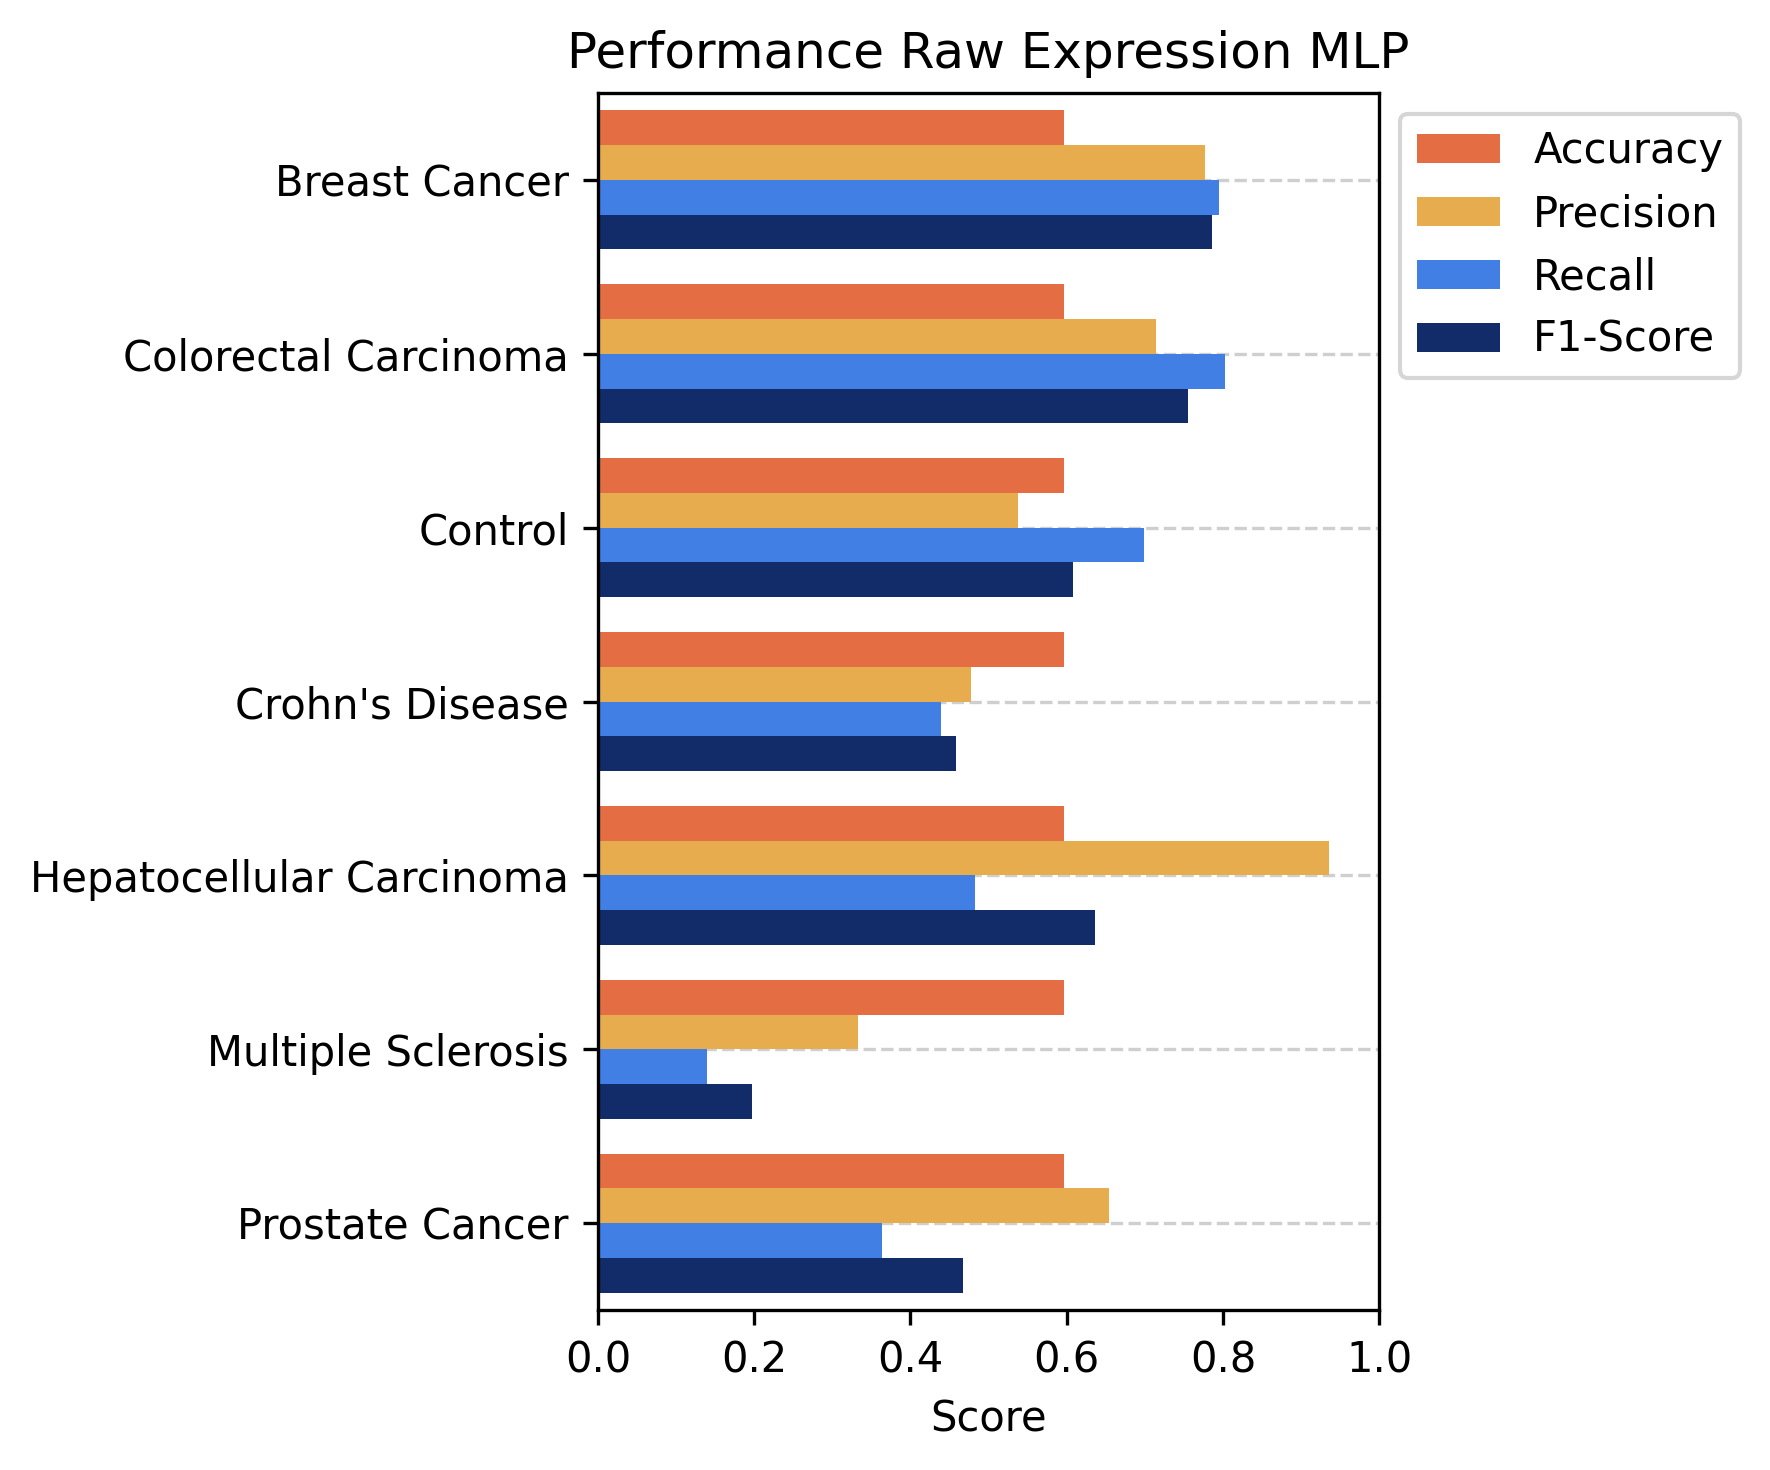

In [20]:
import pandas as pd
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    balanced_accuracy_score,
)

# Assuming y_true and y_pred are already defined
y_true = adata_test.obs["celltype"]  # True labels
y_pred = y_pred  # Predicted labels

# Get the unique labels (cell types or classes)
labels = sorted(set(y_true))

palette = [
    "#ff6028",
    "#ffb234",
    "#2779ff",
    "#022778",
    "#ff958e",
]

# Initialize dictionaries to store metrics
metrics_dict = {
    "Condition": labels,
    "Accuracy": accuracy_score(y_true, y_pred),
    # "Balanced Accuracy": balanced_accuracy_score(y_true, y_pred),
    "Precision": precision_score(
        y_true, y_pred, labels=labels, average=None, zero_division=0
    ),
    "Recall": recall_score(
        y_true, y_pred, labels=labels, average=None, zero_division=0
    ),
    "F1-Score": f1_score(y_true, y_pred, labels=labels, average=None, zero_division=0),
}

# Create a DataFrame
report_df = pd.DataFrame(metrics_dict)

# Display the computed report
print(report_df)

# Plot the results using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape DataFrame to long format for Seaborn
df_long = report_df.melt(id_vars="Condition", var_name="Metric", value_name="Score")

# Plotting
plt.figure(figsize=(6, 5), dpi=300)
sns.barplot(
    y="Condition",
    x="Score",
    hue="Metric",
    data=df_long,
    zorder=2,
    orient="h",
    palette=palette,
)

# Adjust legend location
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# plt.xticks(rotation=90)
plt.xlim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.6, zorder=-3)
plt.title(f"Performance {data_type} MLP")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# 4. Train KNN
y_train = adata_train.obs["celltype"].values

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# 4. Evaluate KNN
# Predict
y_pred = knn.predict(X_test)
accuracy = accuracy_score(adata_test.obs["celltype"], y_pred)

f1_value = f1_score(adata_test.obs["celltype"], y_pred, average="weighted")

print("Predicted labels:", y_pred)
print("Accuracy:", accuracy)
print("F1 Score:", f1_value)

Predicted labels: ['Hepatocellular Carcinoma' 'Hepatocellular Carcinoma' 'Prostate Cancer'
 ... 'Prostate Cancer' 'Prostate Cancer' 'Prostate Cancer']
Accuracy: 0.33007702423445423
F1 Score: 0.3530034515307768


                  Condition  Accuracy  Precision    Recall  F1-Score
0             Breast Cancer  0.330077   0.290411  0.172638  0.216547
1      Colorectal Carcinoma  0.330077   0.117738  0.305835  0.170022
2                   Control  0.330077   0.519001  0.473409  0.495158
3           Crohn's Disease  0.330077   0.397363  0.242808  0.301429
4  Hepatocellular Carcinoma  0.330077   0.437500  0.201210  0.275648
5        Multiple Sclerosis  0.330077   0.455072  0.365116  0.405161
6           Prostate Cancer  0.330077   0.001767  0.006849  0.002809


/tmp/ipykernel_7441/1210530212.py:54: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


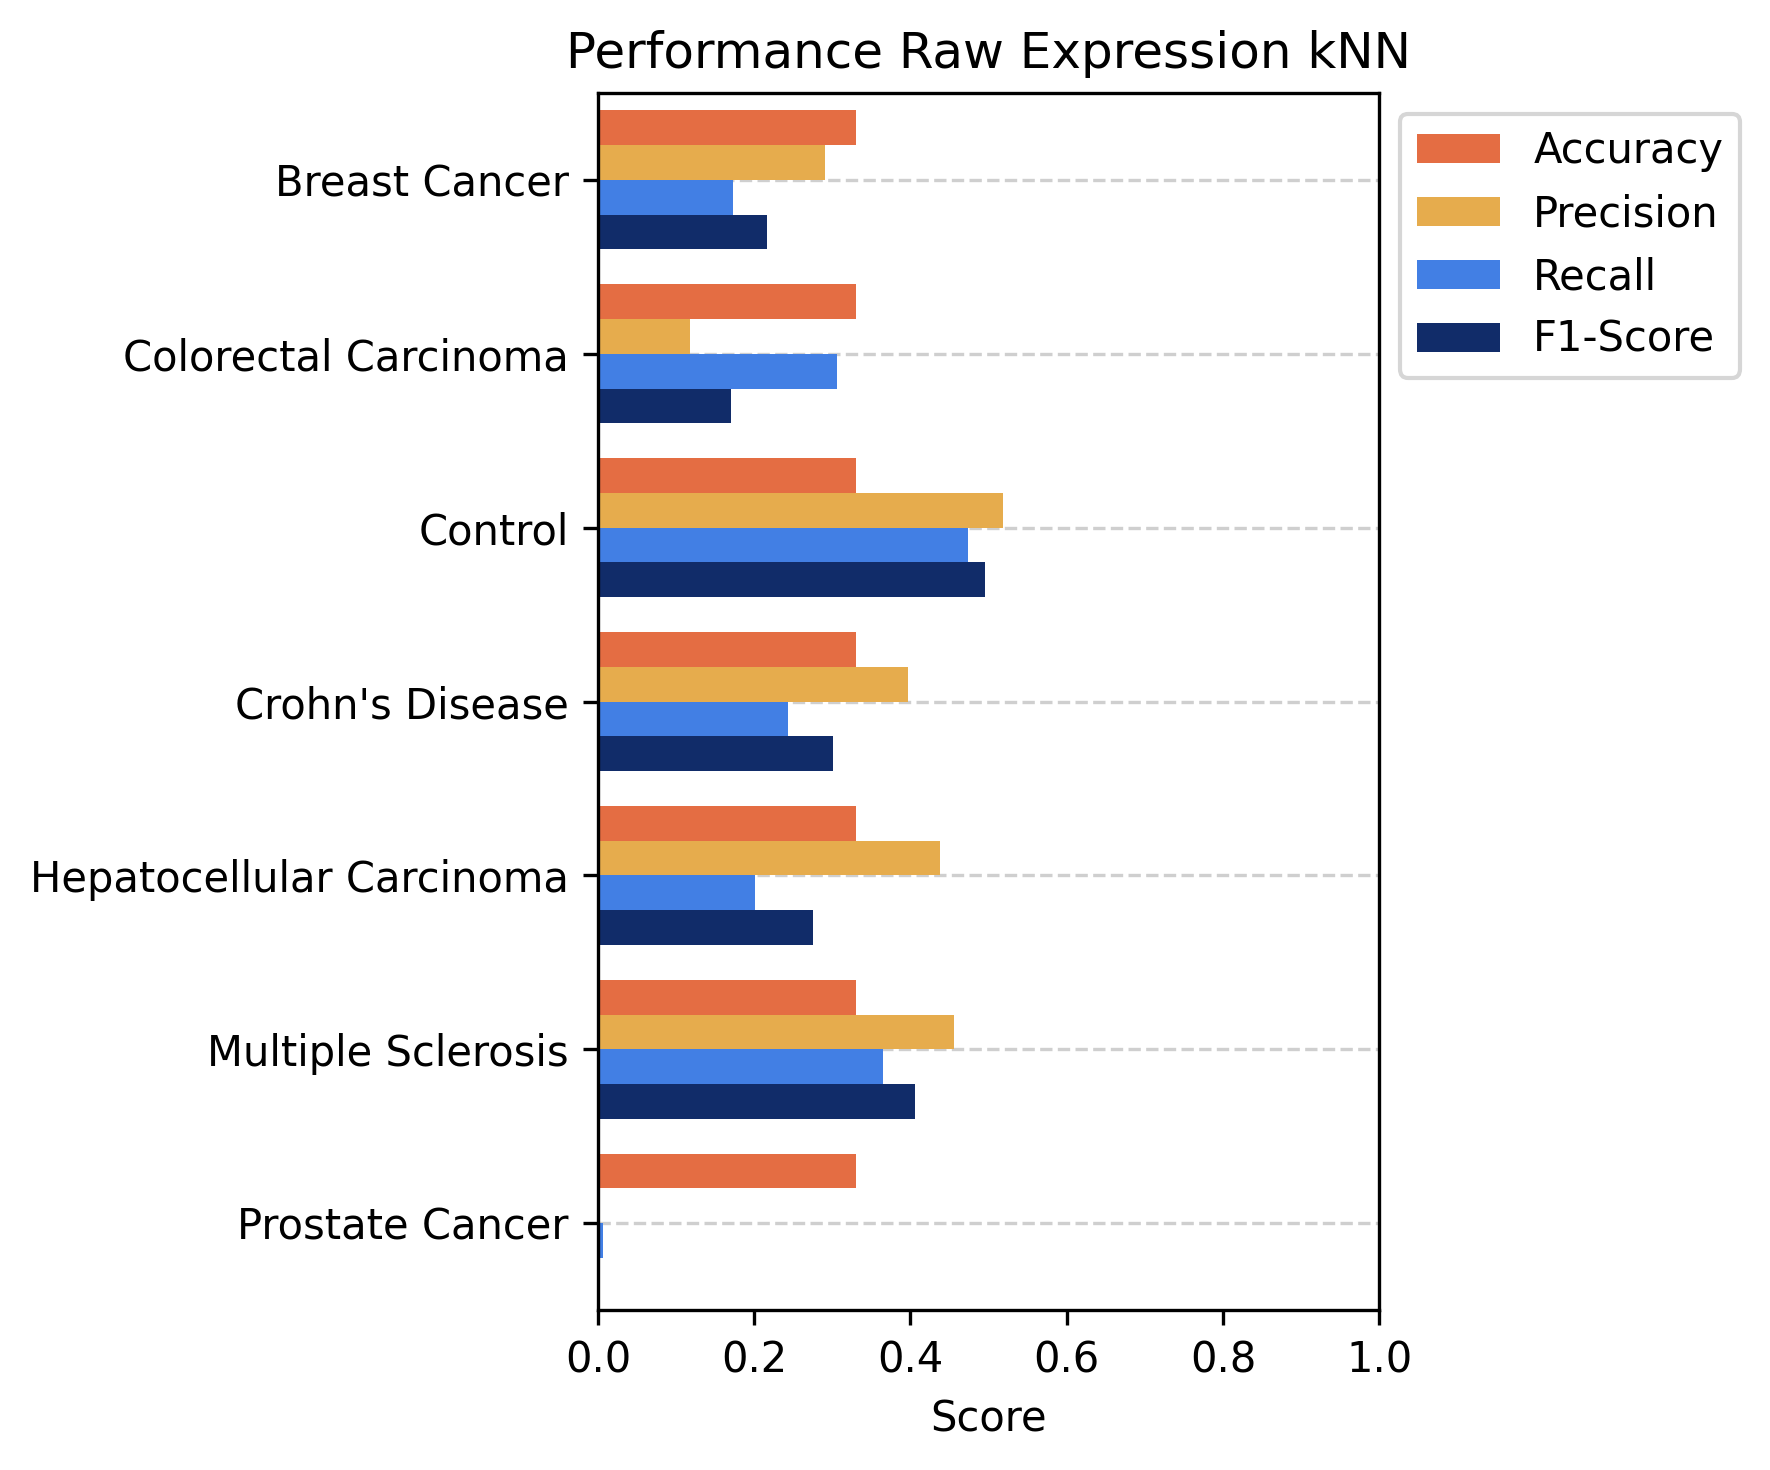

In [23]:
import pandas as pd
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    balanced_accuracy_score,
)

# Assuming y_true and y_pred are already defined
y_true = adata_test.obs["celltype"]  # True labels
y_pred = y_pred  # Predicted labels

# Get the unique labels (cell types or classes)
labels = sorted(set(y_true))

palette = [
    "#ff6028",
    "#ffb234",
    "#2779ff",
    "#022778",
    "#ff958e",
]

# Initialize dictionaries to store metrics
metrics_dict = {
    "Condition": labels,
    "Accuracy": accuracy_score(y_true, y_pred),
    # "Balanced Accuracy": balanced_accuracy_score(y_true, y_pred),
    "Precision": precision_score(
        y_true, y_pred, labels=labels, average=None, zero_division=0
    ),
    "Recall": recall_score(
        y_true, y_pred, labels=labels, average=None, zero_division=0
    ),
    "F1-Score": f1_score(y_true, y_pred, labels=labels, average=None, zero_division=0),
}

# Create a DataFrame
report_df = pd.DataFrame(metrics_dict)

# Display the computed report
print(report_df)

# Plot the results using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape DataFrame to long format for Seaborn
df_long = report_df.melt(id_vars="Condition", var_name="Metric", value_name="Score")

# Plotting
plt.figure(figsize=(6, 5), dpi=300)
sns.barplot(
    y="Condition",
    x="Score",
    hue="Metric",
    data=df_long,
    zorder=2,
    orient="h",
    palette=palette,
)

# Adjust legend location
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

# plt.xticks(rotation=90)
plt.xlim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.6, zorder=-3)
plt.title(f"Performance {data_type} kNN")
plt.ylabel("")
plt.tight_layout()
plt.show()

"                          precision    recall  f1-score   support\n\n           Breast Cancer       0.55      0.79      0.65       614\n    Colorectal Carcinoma       0.67      0.84      0.75       497\n                 Control       0.64      0.63      0.64      2106\n         Crohn's Disease       0.51      0.40      0.45       869\nHepatocellular Carcinoma       0.74      0.84      0.79       661\n      Multiple Sclerosis       0.19      0.08      0.11       430\n         Prostate Cancer       0.42      0.42      0.42       146\n\n                accuracy                           0.61      5323\n               macro avg       0.53      0.57      0.54      5323\n            weighted avg       0.58      0.61      0.59      5323\n"

In [54]:
report

{'Breast Cancer': {'precision': 0.552901023890785,
  'recall': 0.7915309446254072,
  'f1-score': 0.6510381781647689,
  'support': 614.0},
 'Colorectal Carcinoma': {'precision': 0.6720257234726688,
  'recall': 0.8410462776659959,
  'f1-score': 0.7470956210902592,
  'support': 497.0},
 'Control': {'precision': 0.6441658630665381,
  'recall': 0.6343779677113011,
  'f1-score': 0.6392344497607656,
  'support': 2106.0},
 "Crohn's Disease": {'precision': 0.5116959064327485,
  'recall': 0.40276179516685845,
  'f1-score': 0.4507405022537025,
  'support': 869.0},
 'Hepatocellular Carcinoma': {'precision': 0.7442799461641992,
  'recall': 0.8366111951588502,
  'f1-score': 0.7877492877492878,
  'support': 661.0},
 'Multiple Sclerosis': {'precision': 0.1907514450867052,
  'recall': 0.07674418604651163,
  'f1-score': 0.10945273631840796,
  'support': 430.0},
 'Prostate Cancer': {'precision': 0.4189189189189189,
  'recall': 0.4246575342465753,
  'f1-score': 0.4217687074829932,
  'support': 146.0},
 'a

In [51]:
classification_report(adata_test.obs["celltype"], y_pred, output_dict=True)

{'Breast Cancer': {'precision': 0.552901023890785,
  'recall': 0.7915309446254072,
  'f1-score': 0.6510381781647689,
  'support': 614.0},
 'Colorectal Carcinoma': {'precision': 0.6720257234726688,
  'recall': 0.8410462776659959,
  'f1-score': 0.7470956210902592,
  'support': 497.0},
 'Control': {'precision': 0.6441658630665381,
  'recall': 0.6343779677113011,
  'f1-score': 0.6392344497607656,
  'support': 2106.0},
 "Crohn's Disease": {'precision': 0.5116959064327485,
  'recall': 0.40276179516685845,
  'f1-score': 0.4507405022537025,
  'support': 869.0},
 'Hepatocellular Carcinoma': {'precision': 0.7442799461641992,
  'recall': 0.8366111951588502,
  'f1-score': 0.7877492877492878,
  'support': 661.0},
 'Multiple Sclerosis': {'precision': 0.1907514450867052,
  'recall': 0.07674418604651163,
  'f1-score': 0.10945273631840796,
  'support': 430.0},
 'Prostate Cancer': {'precision': 0.4189189189189189,
  'recall': 0.4246575342465753,
  'f1-score': 0.4217687074829932,
  'support': 146.0},
 'a

In [50]:
report_df

precision    recall  f1-score
Breast Cancer              0.552901  0.791531  0.651038
Colorectal Carcinoma       0.672026  0.841046  0.747096
Control                    0.644166  0.634378  0.639234
Crohn's Disease            0.511696  0.402762  0.450741
Hepatocellular Carcinoma   0.744280  0.836611  0.787749
Multiple Sclerosis         0.190751  0.076744  0.109453
Prostate Cancer            0.418919  0.424658  0.421769
accuracy                   0.608304  0.608304  0.608304

In [46]:
report_df

precision    recall  f1-score
Breast Cancer              0.552901  0.791531  0.651038
Colorectal Carcinoma       0.672026  0.841046  0.747096
Control                    0.644166  0.634378  0.639234
Crohn's Disease            0.511696  0.402762  0.450741
Hepatocellular Carcinoma   0.744280  0.836611  0.787749
Multiple Sclerosis         0.190751  0.076744  0.109453
Prostate Cancer            0.418919  0.424658  0.421769
accuracy                   0.608304  0.608304  0.608304

In [219]:
"""MLP Prediction

Structure:  
    1. Imports, Variables, Functions
    2. Define Splits
    3. Train MLP
    4. Evaluate MLP

"""

# 1. Imports, Variables, Functions
# imports
import random
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# variables


# functions

# 2. Process Data
logging.info(f"Unfiltered shape: {adata_test.X.shape}")

# clean unknown values
# mask_unknown = [
#     False if x.split(";")[2] == "Unknown" else True
#     for x in adata_test.obs["ids"].values
# ]

X_train = scgpt_emb_train
X_test = scgpt_emb_test


# replace nans with 0
X_train[np.isnan(X_train)] = 0
X_test[np.isnan(X_test)] = 0

# 3. Define Splits

import sklearn
from sklearn.metrics import f1_score

# 4. Train MLP
y_train = adata_train.obs["celltype"].values


# Create and train the model
mlp = MLPClassifier(
    hidden_layer_sizes=(384, 256, 128, 64),  # Four hidden layers with varying sizes
    activation="relu",  # Activation function for the hidden layers
    solver="adam",  # Optimizer
    max_iter=500,  # Maximum number of iterations
    random_state=42,  # For reproducibility
)
mlp.fit(X_train, y_train)


# 4. Evaluate MLP
# Predict
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(adata_test.obs["celltype"], y_pred)

f1_value = f1_score(adata_test.obs["celltype"], y_pred, average="weighted")


print("Predicted labels:", y_pred)
print("Accuracy:", accuracy)
print("F1 Score:", f1_value)

INFO:root:Unfiltered shape: (3497, 2999)


Predicted labels: ['Control' 'Control' 'Control' ... 'Ulcerative Colitis' 'Control'
 'Ulcerative Colitis']
Accuracy: 0.48212753788961965
F1 Score: 0.46451639653461646


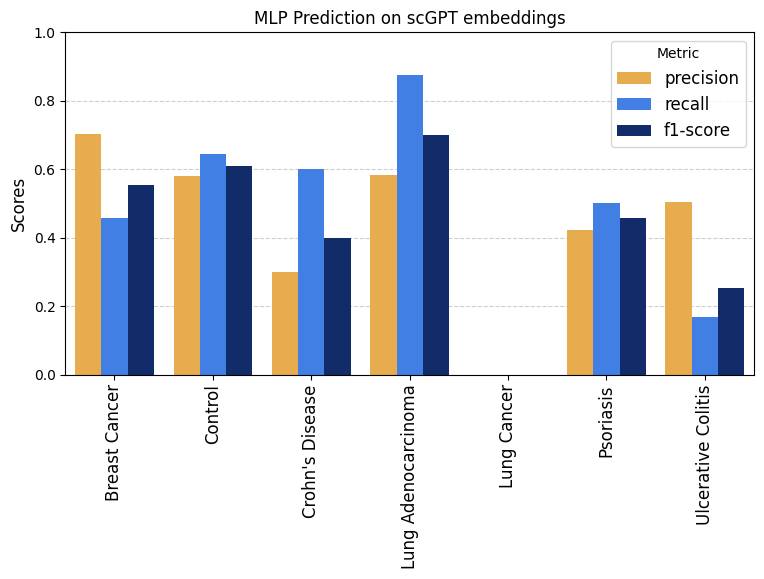

In [220]:
import seaborn as sns

report = classification_report(adata_test.obs["celltype"], y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()
# Drop non-label rows (accuracy, macro avg, weighted avg)
report_df.drop(index=["accuracy", "macro avg", "weighted avg"], inplace=True)
report_df.drop(columns=["support"], inplace=True)


# Creating the dataframe in a long format for seaborn
df_long = report_df.reset_index().melt(
    id_vars="index", var_name="Metric", value_name="Score"
)
df_long.columns = ["Condition", "Metric", "Score"]

custom_palette = {
    "precision": irb_colors[0],  # Blue
    "recall": irb_colors[3],  # Orange
    "f1-score": irb_colors[4],  # Green
}

# Plotting with seaborn
plt.figure(figsize=(8, 4))
sns.barplot(
    x="Condition",
    y="Score",
    hue="Metric",
    data=df_long,
    palette=custom_palette,
    zorder=2,
)

plt.grid(axis="y", linestyle="--", alpha=0.6, zorder=-3)

# Adding labels and title
plt.xlabel("")
plt.ylabel("Scores", fontsize=12)
plt.title("")

plt.legend(title="Metric", loc="upper right", fontsize=12)
plt.xticks(fontsize=12)

plt.tight_layout()
plt.ylim(0, 1)
plt.xticks(rotation=90)
plt.title("MLP Prediction on scGPT embeddings")

plt.savefig(
    os.path.join(output_dir, "mlp_report.scgpt.png"),
    dpi=300,
    bbox_inches="tight",
)

/home/ddalton/miniconda3/envs/scgpt/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/ddalton/miniconda3/envs/scgpt/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


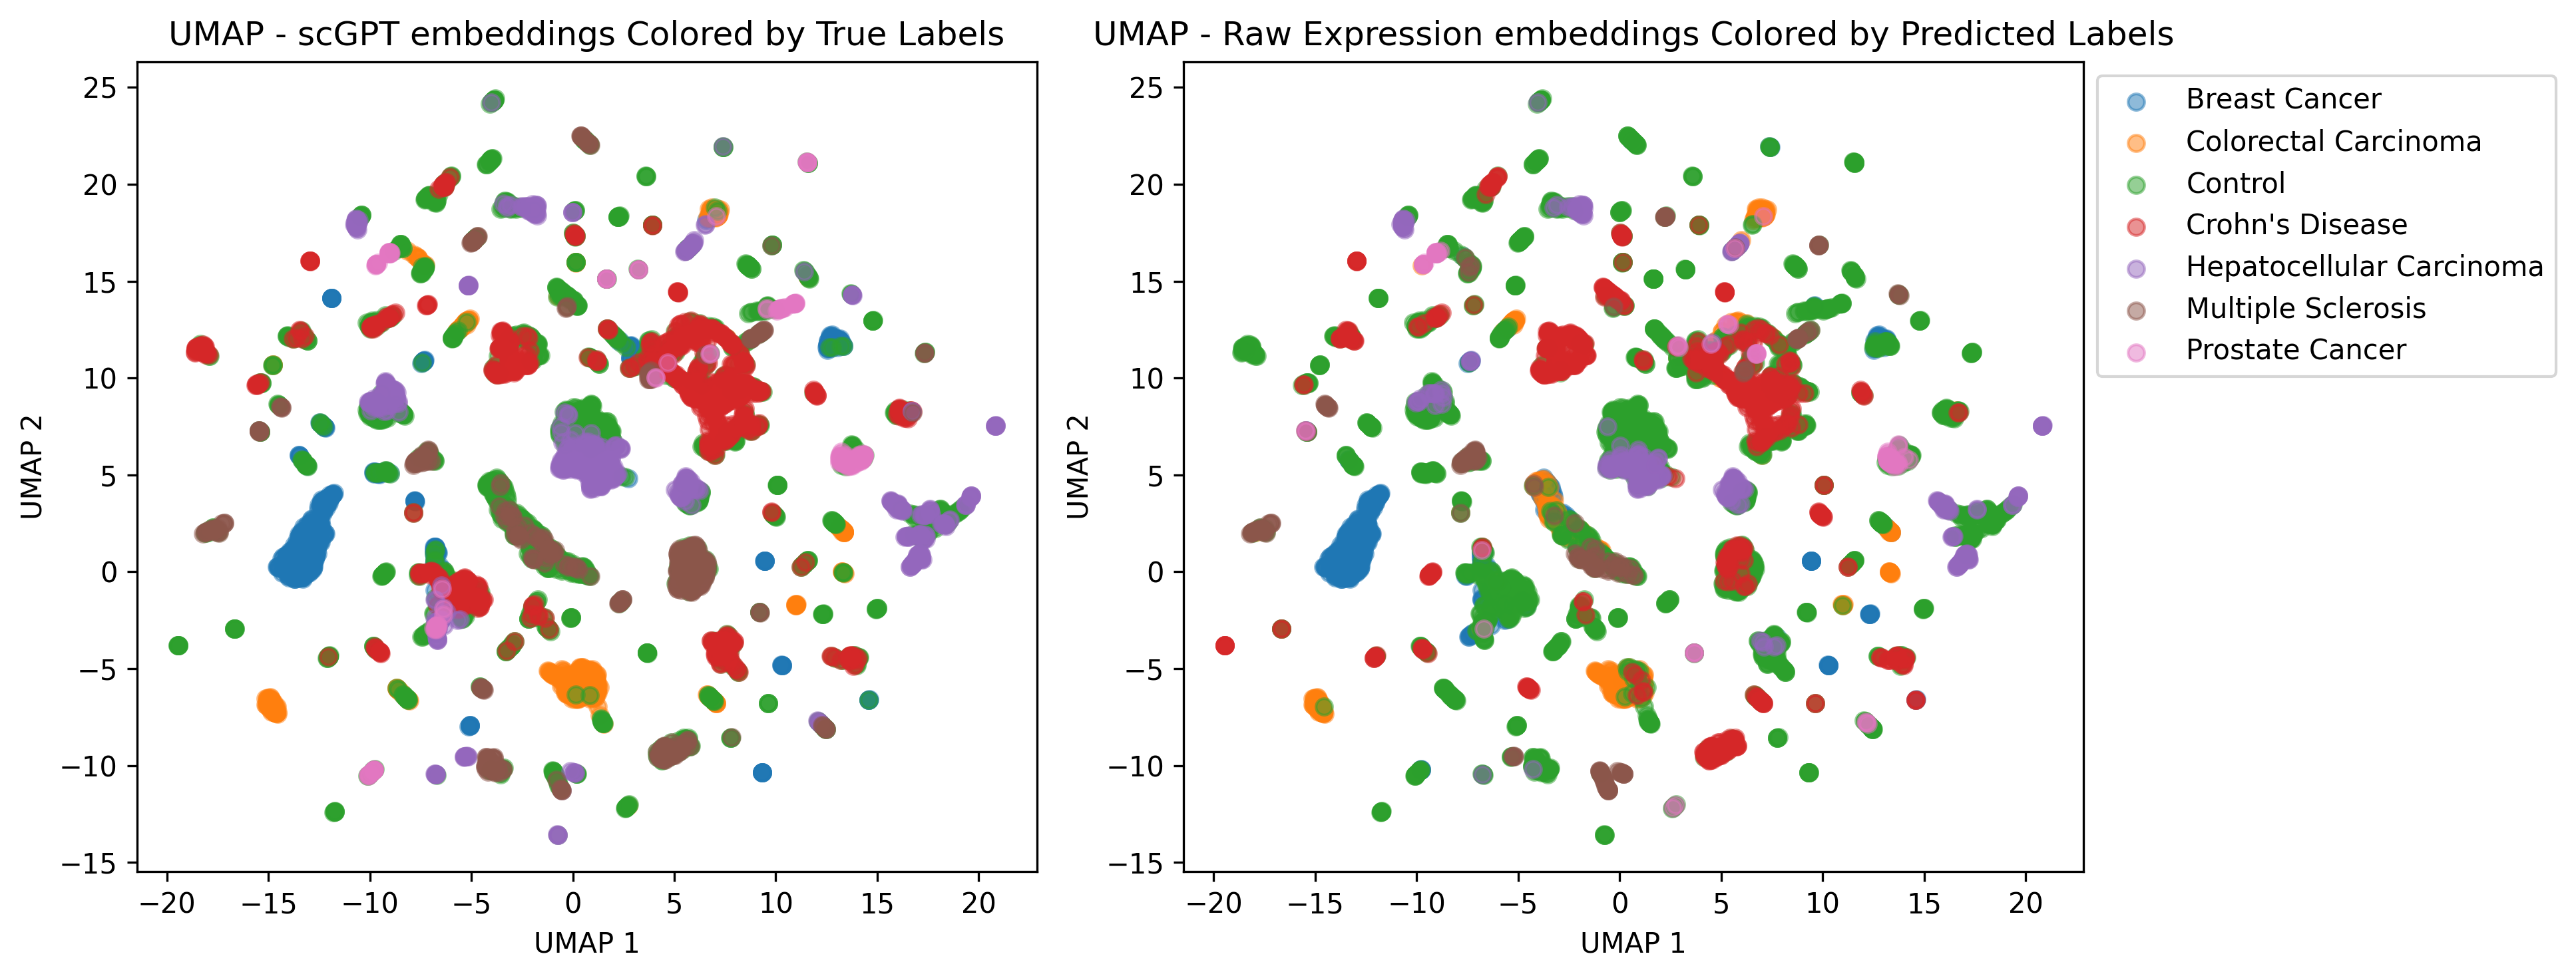

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Define your labels and corresponding colors
labels = np.unique(adata_test.obs["celltype"])

# Create UMAP embeddings
reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=42)
X_test_umap = reducer.fit_transform(X_test)


# color_map = {label: color for label, color in zip(labels, irb_colors)}


# Plotting the UMAP results
fig, axes = plt.subplots(1, 2, figsize=(13, 5), dpi=300)

# UMAP colored by true labels
for label in labels:
    idx = adata_test.obs["celltype"] == label
    axes[0].scatter(
        X_test_umap[idx, 0],
        X_test_umap[idx, 1],
        # c=color_map[label],
        label=label,
        s=35,
        alpha=0.5,
    )
axes[0].set_title("UMAP - scGPT embeddings Colored by True Labels")
# axes[0].legend()
axes[0].set_xlabel("UMAP 1")
axes[0].set_ylabel("UMAP 2")

# UMAP colored by predicted labels
for label in labels:
    idx = y_pred == label
    axes[1].scatter(
        X_test_umap[idx, 0],
        X_test_umap[idx, 1],
        # c=color_map[label],
        label=label,
        s=35,
        alpha=0.5,
    )
axes[1].set_title(f"UMAP - {data_type} embeddings Colored by Predicted Labels")
axes[1].legend(loc="upper left", bbox_to_anchor=(1, 1))

axes[1].set_xlabel("UMAP 1")
axes[1].set_ylabel("UMAP 2")

plt.tight_layout()
# plt.savefig("outputs/umap_raw_data_pred_labels.scgpt.png", dpi=300, bbox_inches="tight")

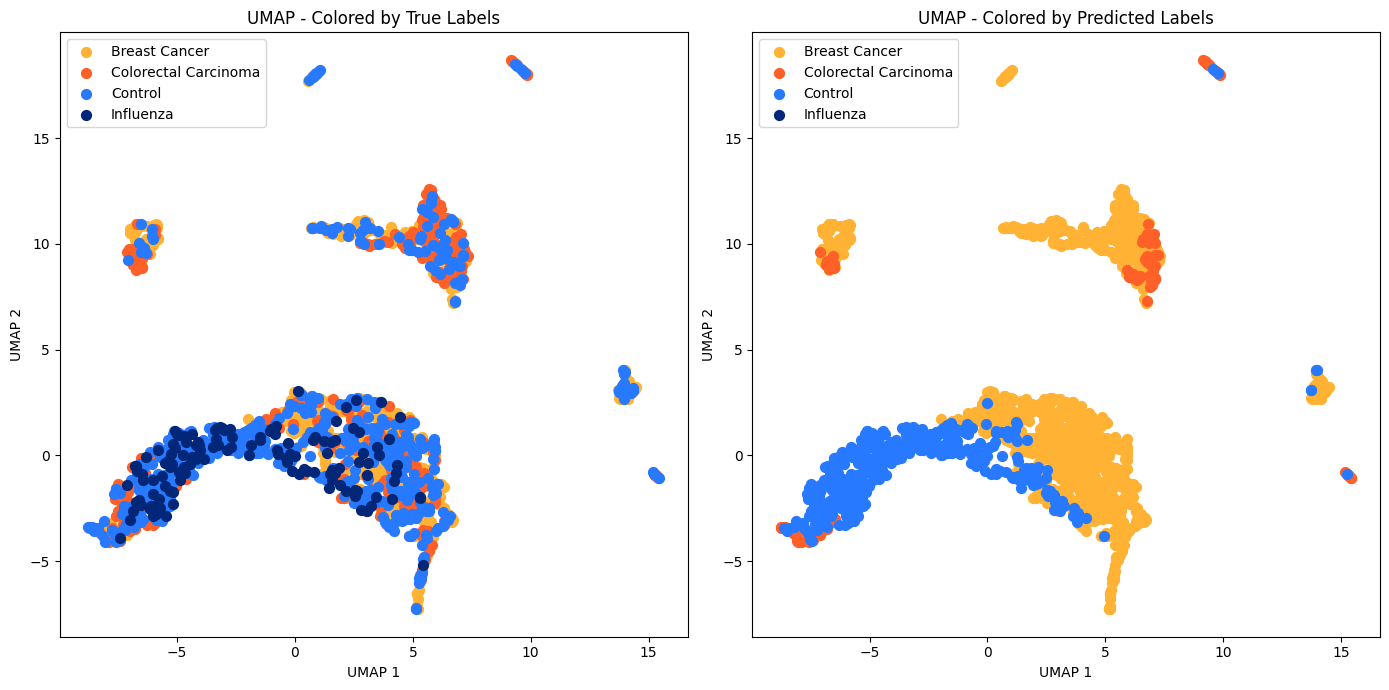

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your labels and corresponding colors
labels = np.unique(y_test)


color_map = {
    label: color for label, color in zip(labels, irb_colors[:1] + irb_colors[2:])
}

# Plotting the UMAP results
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# UMAP colored by true labels
for label in labels:
    idx = y_test == label
    axes[0].scatter(
        X_test_umap[idx, 0], X_test_umap[idx, 1], c=color_map[label], label=label, s=50
    )
axes[0].set_title("UMAP - Colored by True Labels")
axes[0].legend()
axes[0].set_xlabel("UMAP 1")
axes[0].set_ylabel("UMAP 2")

# UMAP colored by predicted labels
for label in labels:
    idx = y_pred == label
    axes[1].scatter(
        X_test_umap[idx, 0], X_test_umap[idx, 1], c=color_map[label], label=label, s=50
    )
axes[1].set_title("UMAP - Colored by Predicted Labels")
axes[1].legend()
axes[1].set_xlabel("UMAP 1")
axes[1].set_ylabel("UMAP 2")

plt.tight_layout()
plt.savefig(
    "outputs/umap.scgpt_embed.pred_labels.raw.png", dpi=300, bbox_inches="tight"
)

In [44]:
group_non_nan_counts

array([[2.],
       [3.]])